In [1]:
#pip install --upgrade vnstock

In [2]:
import vnstock as vn
from datetime import datetime 
from dateutil.relativedelta import relativedelta

import numpy as np
import pandas as pd
import pandas_ta as ta
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
sns.set_style('whitegrid')
plt.style.use("seaborn-v0_8-dark-palette")

In [3]:
last_stock_list = ['SSI', 'VND', 'VCI', 'HCM']

Trong phần này, tôi chọn 4 công ty chứng khoán lớn nhất tại Việt Nam để phân tích xu hướng các yếu tố giao dịch. Tôi thu thập các dữ liệu lịch sử giao dich trong khoảng thời gian 3 năm (6/5/2021 – 6/5/2024) của 4 mã cổ phiếu này bao gồm SSI, VND, VCI, HCM.

In [4]:
# Đặt thời điểm kết thúc là ngày 22/01/2024
#end = datetime.now()
end = datetime(2024, 6, 5)

# Đặt thời điểm bắt đầu là 1 năm trước thời điểm kết thúc
start = datetime(end.year - 3, end.month, end.day)

# Chuyển đổi thành định dạng chuỗi 'YYYY-MM-DD'
start = start.strftime('%Y-%m-%d')
end = end.strftime('%Y-%m-%d')

for stock in last_stock_list:
    # Tạo DataFrame cho cổ phiếu và đặt cột "time" làm index
    stock_data = vn.stock_historical_data(stock, start, end, resolution='1D', type='stock')
    stock_data = stock_data.set_index("time")
    
    # Lưu DataFrame vào biến globals()
    globals()[stock] = stock_data


company_list = [SSI, VND, VCI, HCM]
company_name = ["Chứng khoán SSI", "Chứng khoán VnDirect", 
                "Chứng khoán Vietcap", "Chứng khoán HCM" ]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    





In [5]:
df = pd.concat(company_list, axis=0)
#df.time = pd.to_datetime(df.time)
#df = df.set_index("time")
df.tail(10)


open   high    low  close    volume ticker     company_name
time                                                                    
2024-04-17  27600  27600  26100  26100   5981000    HCM  Chứng khoán HCM
2024-04-19  25600  26200  24800  24850  11996800    HCM  Chứng khoán HCM
2024-04-22  25700  26550  25400  26500   6757900    HCM  Chứng khoán HCM
2024-04-23  26550  26900  25750  26350   7314700    HCM  Chứng khoán HCM
2024-04-24  26800  27650  26600  27650   6962100    HCM  Chứng khoán HCM
2024-04-25  27550  27550  27000  27300   3330900    HCM  Chứng khoán HCM
2024-04-26  26800  27100  26600  27050   6447600    HCM  Chứng khoán HCM
2024-05-02  27050  27100  26200  26350   4281200    HCM  Chứng khoán HCM
2024-05-03  26900  27000  26350  26450   3872300    HCM  Chứng khoán HCM
2024-05-06  26800  28200  26600  27650  11116800    HCM  Chứng khoán HCM

In [6]:
pd.set_option('display.float_format', '{:.2f}'.format)
des_SSI= SSI.describe().rename_axis('SSI', axis=1)
des_SSI

SSI       open     high      low    close      volume
count   728.00   728.00   728.00   728.00      728.00
mean  29161.88 29674.13 28644.81 29123.41 18302667.86
std    8327.58  8412.08  8231.46  8310.24  8893292.06
min   12600.00 13710.00 12560.00 13370.00  4040700.00
25%   20960.00 21297.50 20527.50 20880.00 12147400.00
50%   30285.00 31285.00 29710.00 30385.00 16524600.00
75%   35802.50 36260.00 35200.00 35650.00 22967225.00
max   49380.00 50160.00 47810.00 48590.00 69559104.00

In [7]:
des_VND= VND.describe().rename_axis('VND', axis=1)
des_VND

VND       open     high      low    close       volume
count   725.00   725.00   725.00   725.00       725.00
mean  20824.85 21268.87 20381.22 20791.51  19587745.41
std    5415.08  5503.71  5315.60  5391.76  13286771.52
min    9120.00 10200.00  9120.00  9720.00   2000300.00
25%   16700.00 17280.00 16250.00 16720.00   9442700.00
50%   20500.00 20870.00 20000.00 20400.00  17325100.00
75%   23050.00 23500.00 22700.00 23050.00  26534300.00
max   35080.00 36250.00 34290.00 34780.00 105878000.00

In [8]:
des_VCI= VCI.describe().rename_axis('VCI', axis=1)
des_VCI

VCI       open     high      low    close      volume
count   728.00   728.00   728.00   728.00      728.00
mean  37781.01 38530.50 37023.36 37731.96  5246850.41
std    9177.78  9225.17  9092.50  9142.33  2657339.65
min   15760.00 17140.00 15760.00 16900.00   869200.00
25%   29735.00 30657.50 28852.50 29440.00  3380825.00
50%   39060.00 40450.00 38125.00 39285.00  4783850.00
75%   44097.50 44800.00 43350.00 44025.00  6684950.00
max   58100.00 59250.00 56350.00 58240.00 21562700.00

In [9]:
des_HCM= HCM.describe().rename_axis('HCM', axis=1)
des_HCM

HCM       open     high      low    close      volume
count   728.00   728.00   728.00   728.00      728.00
mean  21179.90 21576.53 20775.76 21137.97  5936075.00
std    5149.97  5174.90  5106.77  5134.78  2974886.14
min    9580.00 10980.00  9580.00 10280.00  1108600.00
25%   16912.50 17260.00 16517.50 16887.50  3956175.00
50%   20940.00 21205.00 20560.00 20840.00  5386950.00
75%   25355.00 25770.00 25032.50 25317.50  7130275.00
max   33000.00 33460.00 32200.00 32479.00 31976200.00

•	Số lượng dữ liệu: Tất cả các mã đều có 728 điểm dữ liệu, trừ VND có 725 điểm dữ liệu. Sự khác biệt này có thể do vào tháng 3, công ty chứng khoán VNDIRECT đã trải qua một cuộc tấn công mạng khiến hệ thống của họ bị sập. Trong thời gian đó, Hose đã ngưng giao dịch với công ty chứng khoán này, có thể gây ra thiếu sót trong dữ liệu. 

•	Giá trung bình: VCI có giá đóng cửa trung bình cao nhất (37,732), tiếp theo là SSI (29,123) , HCM (21,138), và VND (20,791). 

•	Độ lệch chuẩn: Giá lịch sử VCI có độ biến động cao nhất (độ lệch chuẩn cao nhất) với độ lệch chuẩn là 9142.33, tiếp theo là SSI (8310.24), VND (5391.76) và HCM(5134.78).

•	Khối lượng giao dịch: VND có khối lượng giao dịch trung bình cao nhất (19,587,745.41), tiếp theo là SSI (18,302,667.86), HCM (5,936,075), và cuối cùng là VCI (5,246,850.41) có khối lượng giao dịch trung bình thấp nhất
 nhất
h thấp nhất

## Closing Price

<Figure size 5120x3840 with 0 Axes>

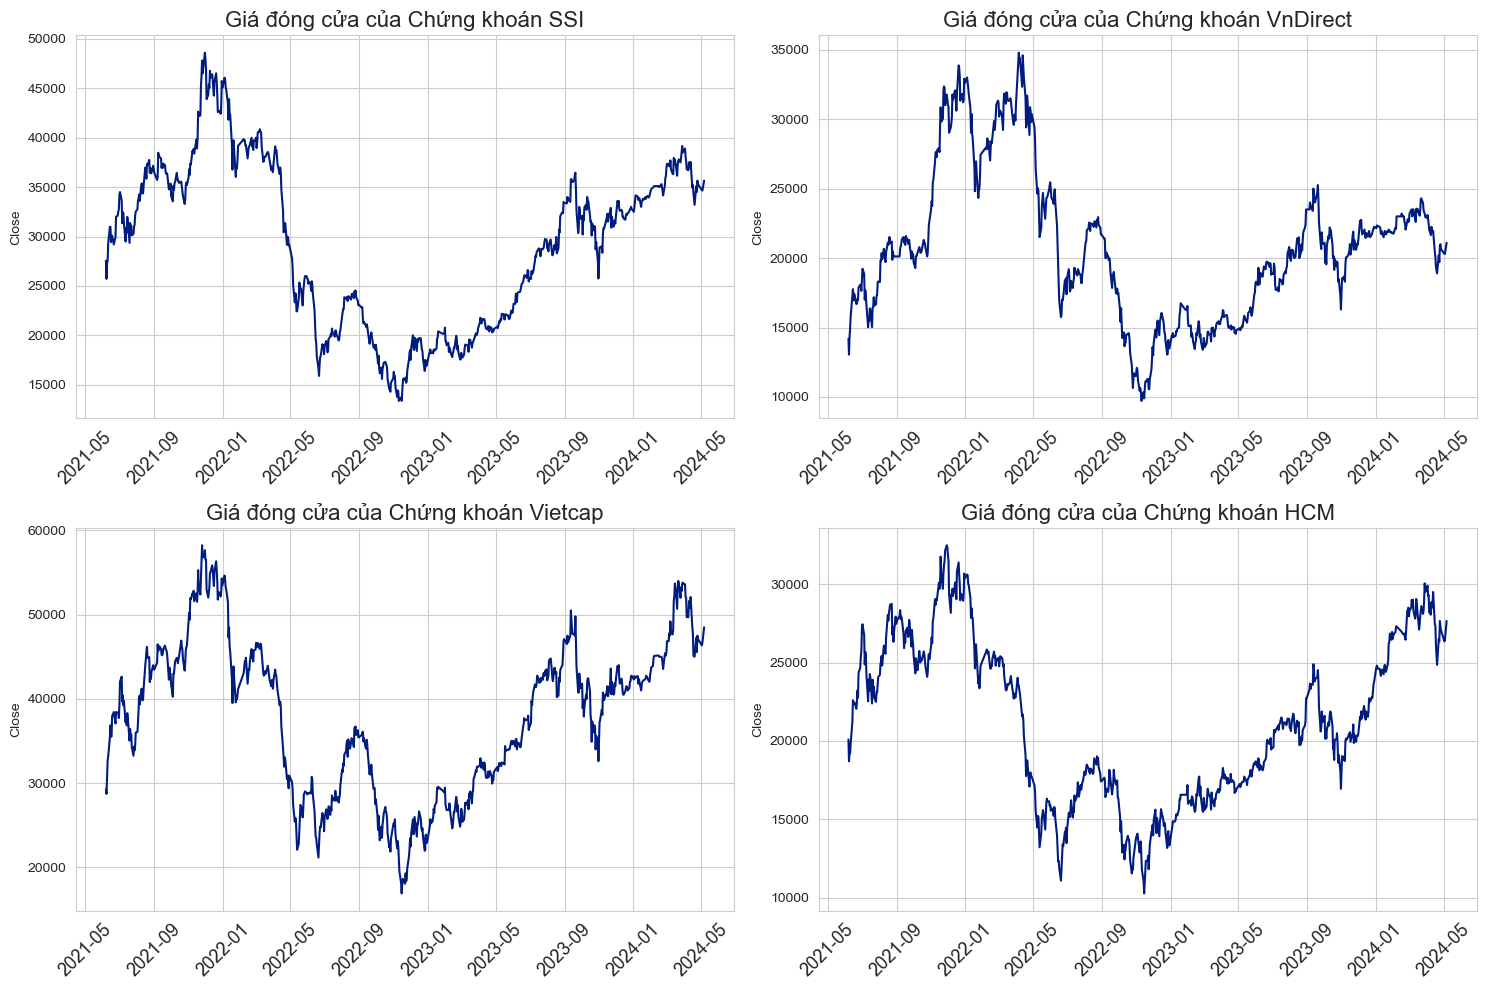

<Figure size 5120x3840 with 0 Axes>

In [10]:
plt.figure(figsize=(15, 10))
sns.set_style('whitegrid')
plt.style.use("seaborn-v0_8-dark-palette")
%matplotlib inline
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    ax = plt.plot(company['close'] )
    plt.ylabel('Close')
    plt.xlabel(None)
    plt.xticks(rotation = 45, fontsize=13)
    plt.title(f"Giá đóng cửa của {company_name[i - 1]}",
             fontsize=16)
    
plt.tight_layout()
output_file_path = 'Closing_price.png'
plt.savefig(output_file_path, format='png', bbox_inches='tight')
plt.figure(dpi=800)

Ta thấy giá đóng cửa các cổ phiếu có xu hướng khá tương đồng, đều tăng mạnh ở tháng 5 và giảm mạnh trong tháng 9 đến tháng 11.

## Volume of Sales

<Figure size 5120x3840 with 0 Axes>

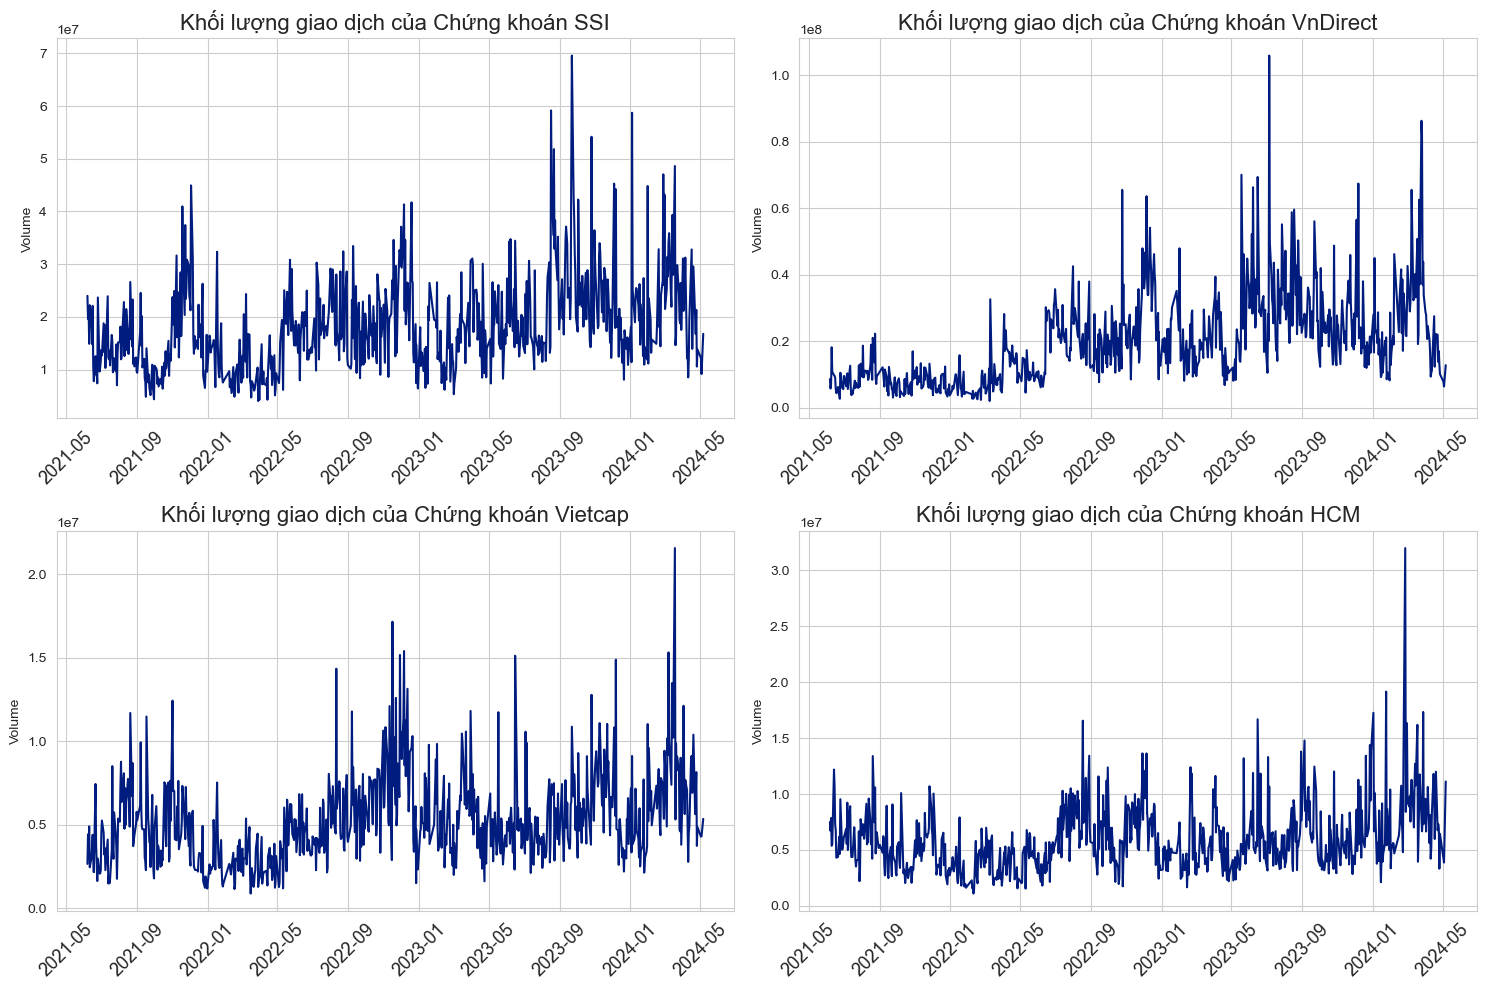

<Figure size 5120x3840 with 0 Axes>

In [11]:
plt.figure(figsize=(15, 10))
sns.set_style('whitegrid')
plt.style.use("seaborn-v0_8-dark-palette")
%matplotlib inline
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    ax = plt.plot(company['volume'] )
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.xticks(rotation = 45, fontsize=13)
    plt.title(f"Khối lượng giao dịch của {company_name[i - 1]}",
             fontsize =16)
    
plt.tight_layout()
output_file_path = 'Volume.png'
plt.savefig(output_file_path, format='png', bbox_inches='tight')
plt.figure(dpi=800)

Khối lượng giao dịch của cổ phiếu VND ổn định xung quanh dưới mức 10 triệu (0.1e8) từ tháng 05/2021 đến tháng 05/2022, nhưng sau đó có sự biến động lớn với khối lượng giao dịch dao động xung quanh 30 triệu (0.4e8) trong giai đoạn từ 2022 đến 2024.

Trong khi đó, các mã cổ phiếu khác có khối lượng giao dịch ổn định hơn. SSI có khối lượng giao dịch dao động xung quanh gần 20 triệu (2e7), trong khi HCM và VCI có khối lượng giao dịch dao động xung quanh ở mức thấp hơn, chỉ khoảng 5 triệu (0.5e7).


## Moving average

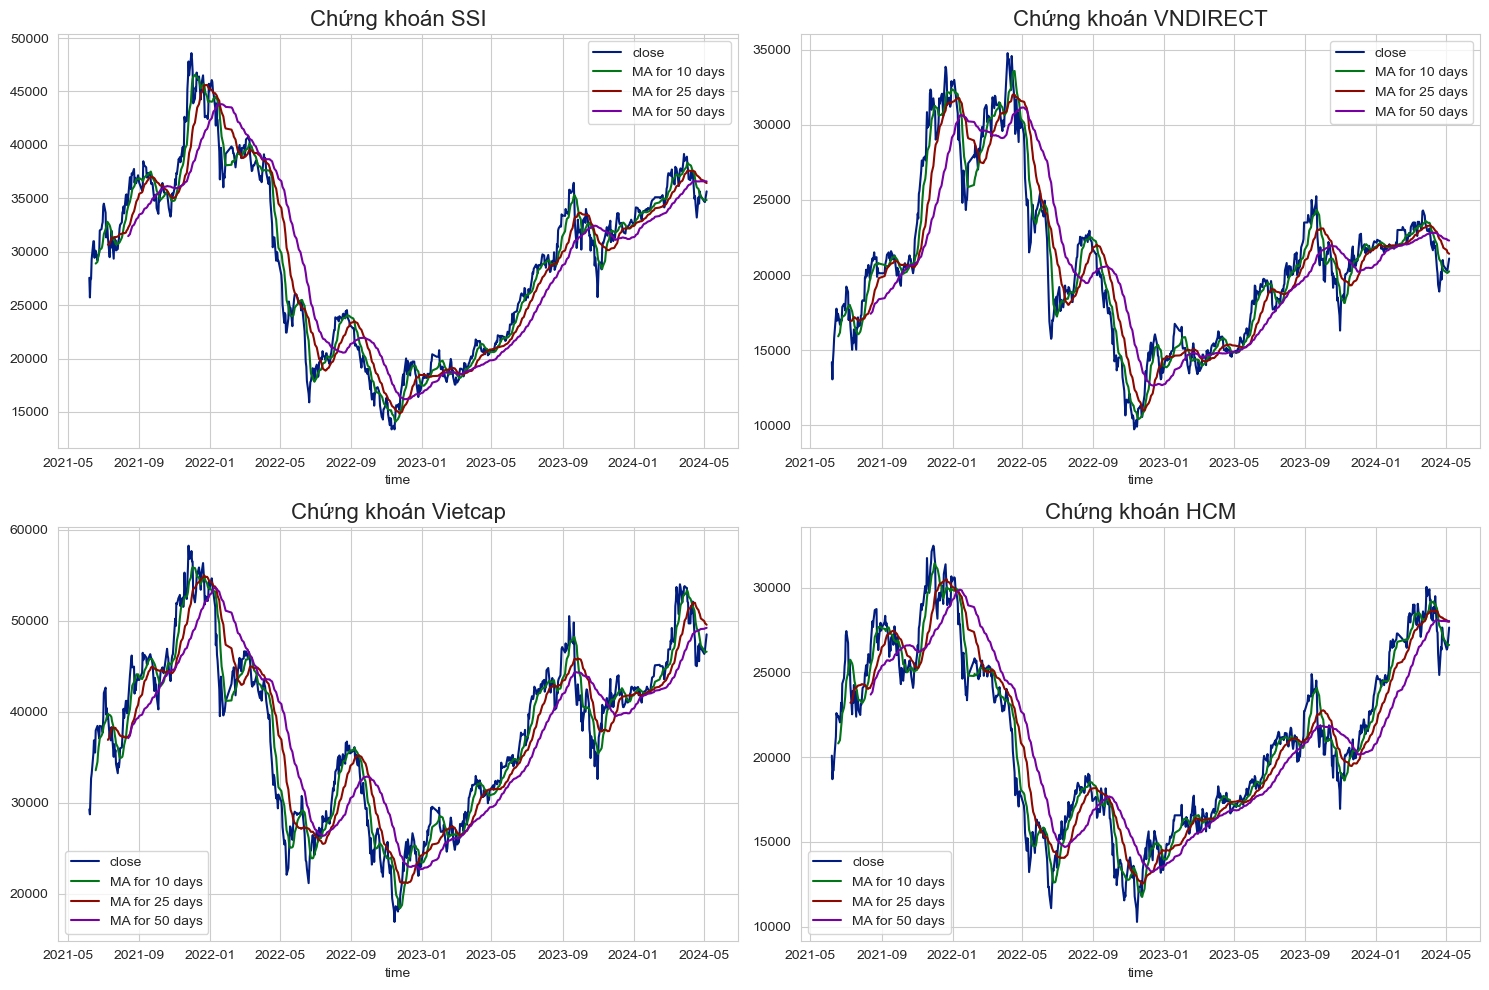

<Figure size 1280x960 with 0 Axes>

In [12]:
ma_day = [10, 25, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

SSI[['close', 'MA for 10 days', 'MA for 25 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('Chứng khoán SSI', fontsize = 16)

VND[['close', 'MA for 10 days', 'MA for 25 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('Chứng khoán VNDIRECT', fontsize = 16)

VCI[['close', 'MA for 10 days', 'MA for 25 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('Chứng khoán Vietcap', fontsize = 16)

HCM[['close', 'MA for 10 days', 'MA for 25 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('Chứng khoán HCM', fontsize = 16)

plt.figure(dpi=200)
fig.tight_layout()
output_file_path = 'MA.png'
plt.savefig(output_file_path, format='png', bbox_inches='tight')


Qua biểu đồ đường giá đóng cửa và các đường trung bình động giá đóng cửa, ta thấy 4 cổ phiếu đều có nét tương đồng là đường giá cắt qua đường MA 20 ngày, nhưng lại nhỏ hơn đường MA 50 ngày và đồng thời đường MA 25 ngày sắp hoặc đã cắt đường MA 50 ngày từ trên xuống. Điều đó nói lên các tín hiệu sau đây: 

-	Đường giá cắt qua đường MA 20 ngày: Khi đường giá cắt qua đường MA 20 ngày từ dưới lên, đây thường được coi là một tín hiệu tích cực. Tuy nhiên, khi đường giá lại nhỏ hơn đường MA 50 ngày, chúng ta cần xem xét kỹ lưỡng hơn. 

-	Đường MA 25 ngày cắt đường MA 50 ngày từ trên xuống: Đây là tín hiệu bán. Khi đường MA 25 ngày cắt đường MA 50 ngày từ trên xuống, nó cho thấy xu hướng giá có khả năng chuyển từ tăng sang giảm. Điều này thường được hiểu là sự yếu hơn của xu hướng tăng giá và có thể là dấu hiệu của một sự điều chỉnh hoặc đảo chiều. 

Tóm lại, việc kết hợp cả hai tín hiệu trên cho thấy khả năng giảm giá trong tương lai, và do đó được coi là tín hiệu bán dưới góc nhìn phân tích kỹ thuật.


## The daily return of the stock on average

<Figure size 5120x3840 with 0 Axes>

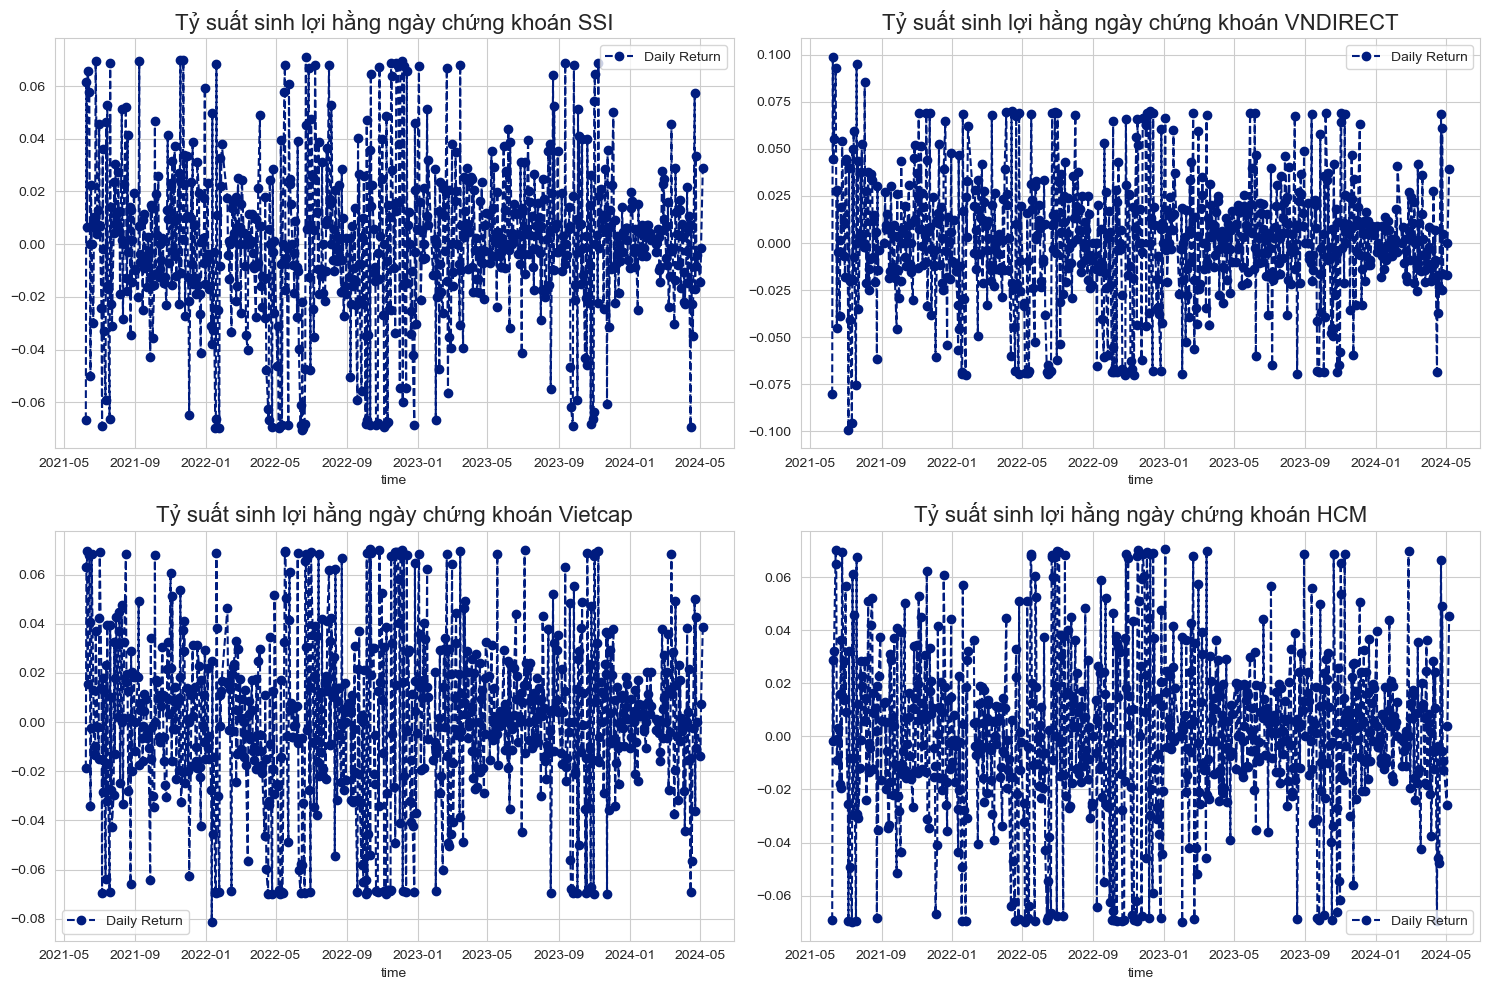

<Figure size 5120x3840 with 0 Axes>

In [13]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

SSI['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('Tỷ suất sinh lợi hằng ngày chứng khoán SSI', fontsize = 16)

VND['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('Tỷ suất sinh lợi hằng ngày chứng khoán VNDIRECT', fontsize = 16)

VCI['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('Tỷ suất sinh lợi hằng ngày chứng khoán Vietcap', fontsize = 16)

HCM['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('Tỷ suất sinh lợi hằng ngày chứng khoán HCM', fontsize = 16)

fig.tight_layout()
output_file_path = 'return.png'
plt.savefig(output_file_path, format='png', bbox_inches='tight')
plt.figure(dpi=800)

<Figure size 5120x3840 with 0 Axes>

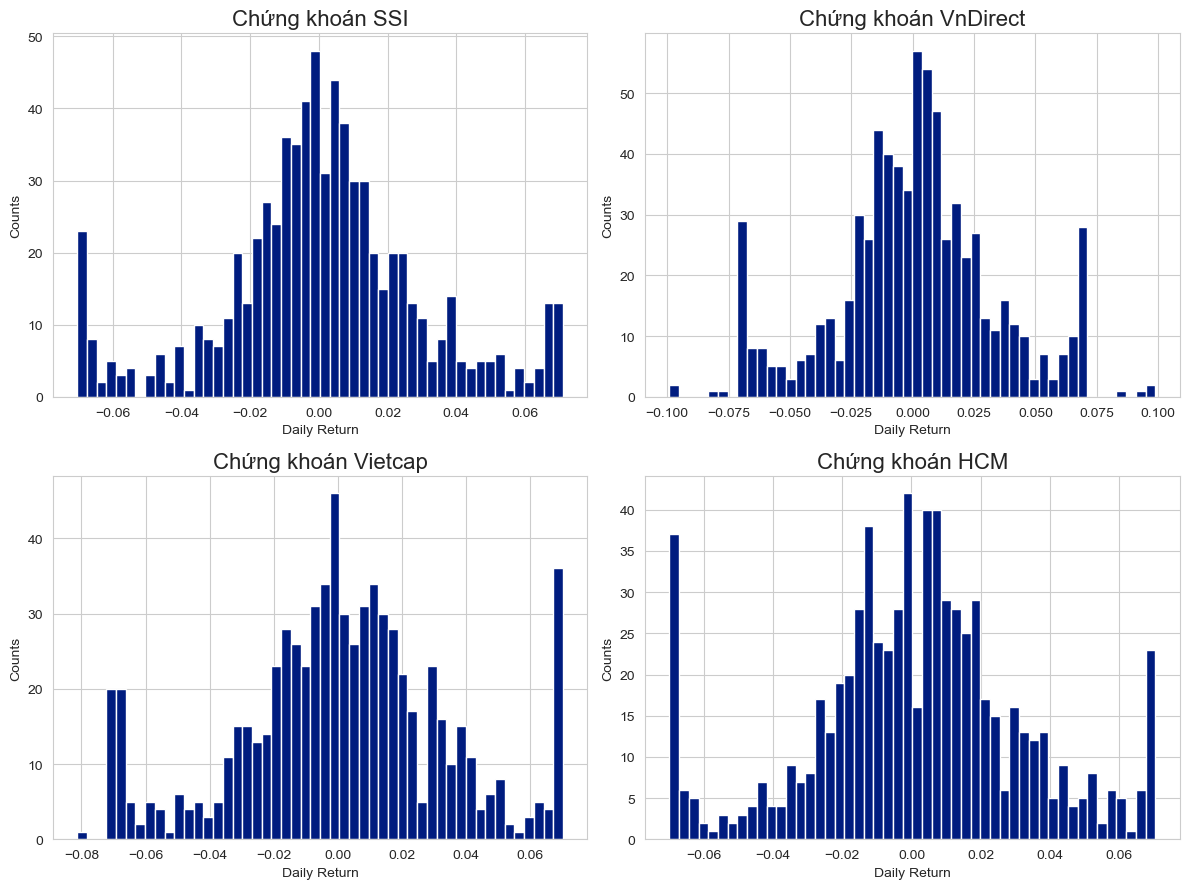

<Figure size 5120x3840 with 0 Axes>

In [14]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}', 
             fontsize = 16)
    
plt.tight_layout()
output_file_path = 'dist_return.png'
plt.savefig(output_file_path, format='png', bbox_inches='tight')
plt.figure(dpi=800)

Qua 2 biểu đồ trên, ta có thể rút ra được các nhận định sau: 

•	Có thể nhận thấy một số xu hướng tương đồng giữa bốn mã cổ phiếu qua biểu đồ đầu tiên. Đặc biệt là trong khoảng thời gian từ tháng 1 năm 2023 đến tháng 5 năm 2024, cả bốn cổ phiếu đều có xu hướng tương đồng về tỷ suất sinh lợi như một mô hình xu hướng theo thời gian. Cụ thể, từ tháng 3 năm 2023 đến tháng 5 năm 2023, có mức tỷ suất sinh lợi thấp và ổn định so với thời gian gần đó, trong khi từ tháng 9 năm 2023 đến gần tháng 1 năm 2024, có mức tỷ suất sinh lợi cao và dao động mạnh hơn so với vài tháng trước đó. 

•	Phân phối lợi nhuận hàng ngày: Biểu đồ histogram phân phối lợi nhuận hàng ngày của các mã cổ phiếu cho thấy mức độ biến động khác nhau. Khi biểu đồ hẹp và nhọn hơn, đồ thị tập trung cao hơn vào khu vực trung tâm; như trường hợp của VND và SSI . Cả hai đều có phân phối khá nhọn so với hai mã cổ phiếu khác là VCI và HCM cho thấy phần lớn thời gian thì tỷ suất sinh lợi vẫn ổn định ở mức nhỏ. Tuy nhiên, ở VND, tần suất phân bố đồng đều ở cả hai phía cực -0.75 và 0.75, với giá trị tần suất khá cao là gần 30 lần; trong khi tần suất lợi nhuận hằng ngày ở hai phía cực của SSI, phân bổ phần lớn ở mức độ âm, cho thấy nếu biến động mạnh thì sẽ có xu hướng giảm tỷ suất lợi nhuận theo ngày. Khác với hai mã cổ phiếu trên, VCI và HCM có phân phối rộng hơn. Tuy nhiên, giá trị tần suất lớn nhất vẫn gần 0, cho thấy tỷ suất sinh lợi ổn định ở mức thấp xuất hiện nhiều nhất, với tần suất trên 40 lần. Sự khác biệt về phân phối tỷ suất sinh lợi hàng ngày của VCI và HCM nằm ở phân bố tần suất ở hai phía cực. VCI có phân bố tần suất lớn ở phía cực dương 0.7, lên đến gần 35 lần xuất hiện, trong khi HCM lại có phân bố tần suất lớn ở phía cực âm -0.7, với hơn 35 lần xuất hiện. Điều này cho thấy khi có biến động mạnh, VCI có xu hướng tăng tỷ suất lợi nhuận hàng ngày, trong khi HCM có xu hướng giảm


## The correlation between different stocks closing prices

In [15]:
df

open   high    low  close    volume ticker     company_name
time                                                                    
2021-06-07  28180  28820  26590  27560  23994300    SSI  Chứng khoán SSI
2021-06-08  27480  28000  25720  25720  19617700    SSI  Chứng khoán SSI
2021-06-09  26070  27510  25140  27300  21306400    SSI  Chứng khoán SSI
2021-06-10  27300  27910  27180  27480  14900900    SSI  Chứng khoán SSI
2021-06-11  27180  29340  27120  29290  22212500    SSI  Chứng khoán SSI
...           ...    ...    ...    ...       ...    ...              ...
2024-04-25  27550  27550  27000  27300   3330900    HCM  Chứng khoán HCM
2024-04-26  26800  27100  26600  27050   6447600    HCM  Chứng khoán HCM
2024-05-02  27050  27100  26200  26350   4281200    HCM  Chứng khoán HCM
2024-05-03  26900  27000  26350  26450   3872300    HCM  Chứng khoán HCM
2024-05-06  26800  28200  26600  27650  11116800    HCM  Chứng khoán HCM

[2909 rows x 7 columns]

In [16]:
df2 = df.reset_index()
df2

time   open   high    low  close    volume ticker     company_name
0     2021-06-07  28180  28820  26590  27560  23994300    SSI  Chứng khoán SSI
1     2021-06-08  27480  28000  25720  25720  19617700    SSI  Chứng khoán SSI
2     2021-06-09  26070  27510  25140  27300  21306400    SSI  Chứng khoán SSI
3     2021-06-10  27300  27910  27180  27480  14900900    SSI  Chứng khoán SSI
4     2021-06-11  27180  29340  27120  29290  22212500    SSI  Chứng khoán SSI
...          ...    ...    ...    ...    ...       ...    ...              ...
2904  2024-04-25  27550  27550  27000  27300   3330900    HCM  Chứng khoán HCM
2905  2024-04-26  26800  27100  26600  27050   6447600    HCM  Chứng khoán HCM
2906  2024-05-02  27050  27100  26200  26350   4281200    HCM  Chứng khoán HCM
2907  2024-05-03  26900  27000  26350  26450   3872300    HCM  Chứng khoán HCM
2908  2024-05-06  26800  28200  26600  27650  11116800    HCM  Chứng khoán HCM

[2909 rows x 8 columns]

In [17]:
# Tạo DataFrame cho từng ticker
df_SSI = df2[df2['ticker'] == 'SSI'][['time', 'close']].set_index('time').rename(columns={'close': 'SSI'})
df_VND = df2[df2['ticker'] == 'VND'][['time', 'close']].set_index('time').rename(columns={'close': 'VND'})
df_VCI = df2[df2['ticker'] == 'VCI'][['time', 'close']].set_index('time').rename(columns={'close': 'VCI'})
df_HCM = df2[df2['ticker'] == 'HCM'][['time', 'close']].set_index('time').rename(columns={'close': 'HCM'})
df_vnindex = vn.stock_historical_data("VNINDEX", start, end, "1D", "index")
df_vnindex = df_vnindex[['time', 'close']].set_index('time').rename(columns={'close': 'VNINDEX'})

df_SSI = df_SSI.loc[~df_SSI.index.duplicated(keep='first')]
df_VND = df_VND.loc[~df_VND.index.duplicated(keep='first')]
df_VCI = df_VCI.loc[~df_VCI.index.duplicated(keep='first')]
df_HCM = df_HCM.loc[~df_HCM.index.duplicated(keep='first')]

# Kết hợp các DataFrame theo cột 'time'
closing_df = pd.concat([df_SSI, df_VND, df_VCI, df_HCM, df_vnindex], axis=1)



# Hiển thị DataFrame mới
closing_df


SSI      VND    VCI    HCM  VNINDEX
time                                             
2021-06-07  27560 14190.00  29270  20090  1358.78
2021-06-08  25720 13050.00  28720  18700  1319.88
2021-06-09  27300 14340.00  30530  19240  1332.90
2021-06-10  27480 14980.00  32659  19210  1323.58
2021-06-11  29290 15810.00  33160  19830  1351.74
...           ...      ...    ...    ...      ...
2024-04-25  35350 21000.00  47000  27300  1204.97
2024-04-26  35200 20650.00  47000  27050  1209.52
2024-05-02  34700 20300.00  46350  26350  1216.36
2024-05-03  34650 20300.00  46700  26450  1221.03
2024-05-06  35650 21100.00  48500  27650  1241.58

[727 rows x 5 columns]

In [18]:
print(closing_df.isna().sum())

SSI        0
VND        3
VCI        0
HCM        0
VNINDEX    5
dtype: int64


In [19]:
closing_df = closing_df.dropna()

In [20]:
stock_rets = closing_df.pct_change()
stock_rets 

SSI   VND   VCI   HCM  VNINDEX
time                                       
2021-06-07   NaN   NaN   NaN   NaN      NaN
2021-06-08 -0.07 -0.08 -0.02 -0.07    -0.03
2021-06-09  0.06  0.10  0.06  0.03     0.01
2021-06-10  0.01  0.04  0.07 -0.00    -0.01
2021-06-11  0.07  0.06  0.02  0.03     0.02
...          ...   ...   ...   ...      ...
2024-04-25 -0.01  0.00 -0.01 -0.01    -0.00
2024-04-26 -0.00 -0.02  0.00 -0.01     0.00
2024-05-02 -0.01 -0.02 -0.01 -0.03     0.01
2024-05-03 -0.00  0.00  0.01  0.00     0.00
2024-05-06  0.03  0.04  0.04  0.05     0.02

[719 rows x 5 columns]

In [21]:
stock_rets = stock_rets.dropna()

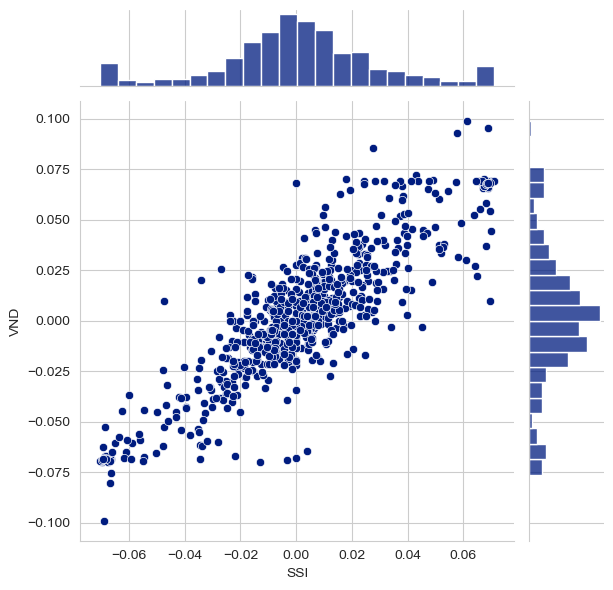

In [22]:
sns.jointplot(x='SSI', y='VND', data=stock_rets.reset_index(), kind='scatter')

Áp dụng các biểu đồ để thể hiện mối tương quan giữa các biến: 

- Biểu đồ Histogram: Các biểu đồ histogram nằm trên đường chéo từ trên trái xuống dưới phải thể hiện phân bố của từng biến. Mỗi biểu đồ cho thấy tần suất phân bố của giá cổ phiếu cho mỗi mã, chỉ số.

- Biểu đồ Phân tán: Các biểu đồ phân tán nằm ngoài ở 2 bên đường chéo thể hiện mối tương quan giữa các mã chứng khoán, chỉ số. 

- Biểu đồ hồi quy: Biểu đồ hồi quy sẽ thể hiện mối quan hệ giữa hai mã chứng khoán hoặc chỉ số. Trong trường hợp này, mỗi điểm trên biểu đồ sẽ thể hiện giá cổ phiếu của hai mã hoặc chỉ số tại một thời điểm nhất định. Đường hồi quy sẽ được vẽ để thể hiện xu hướng chung của dữ liệu. 

- Biểu đồ ước lượng mật độ hạt nhân: Biểu đồ này sẽ thể hiện mật độ của các điểm dữ liệu. Trong trường hợp này, đường kẻ màu xanh trong biểu đồ phân tán sẽ thể hiện mật độ điểm dữ liệu. Mỗi đường kẻ màu xanh càng đậm thì mật độ càng cao, tức là có nhiều điểm dữ liệu tập trung ở đó hơn. 

- Bản đồ nhiệt hệ số tương quan: là một cách trực quan hóa dữ liệu trong đó các giá trị trong một ma trận (hoặc một bảng dữ liệu) được biểu diễn bằng màu sắc. Mỗi ô trong biểu đồ nhiệt biểu diễn hệ số tương quan giữa các cổ phiếu, chỉ số.


<Figure size 12800x9600 with 0 Axes>

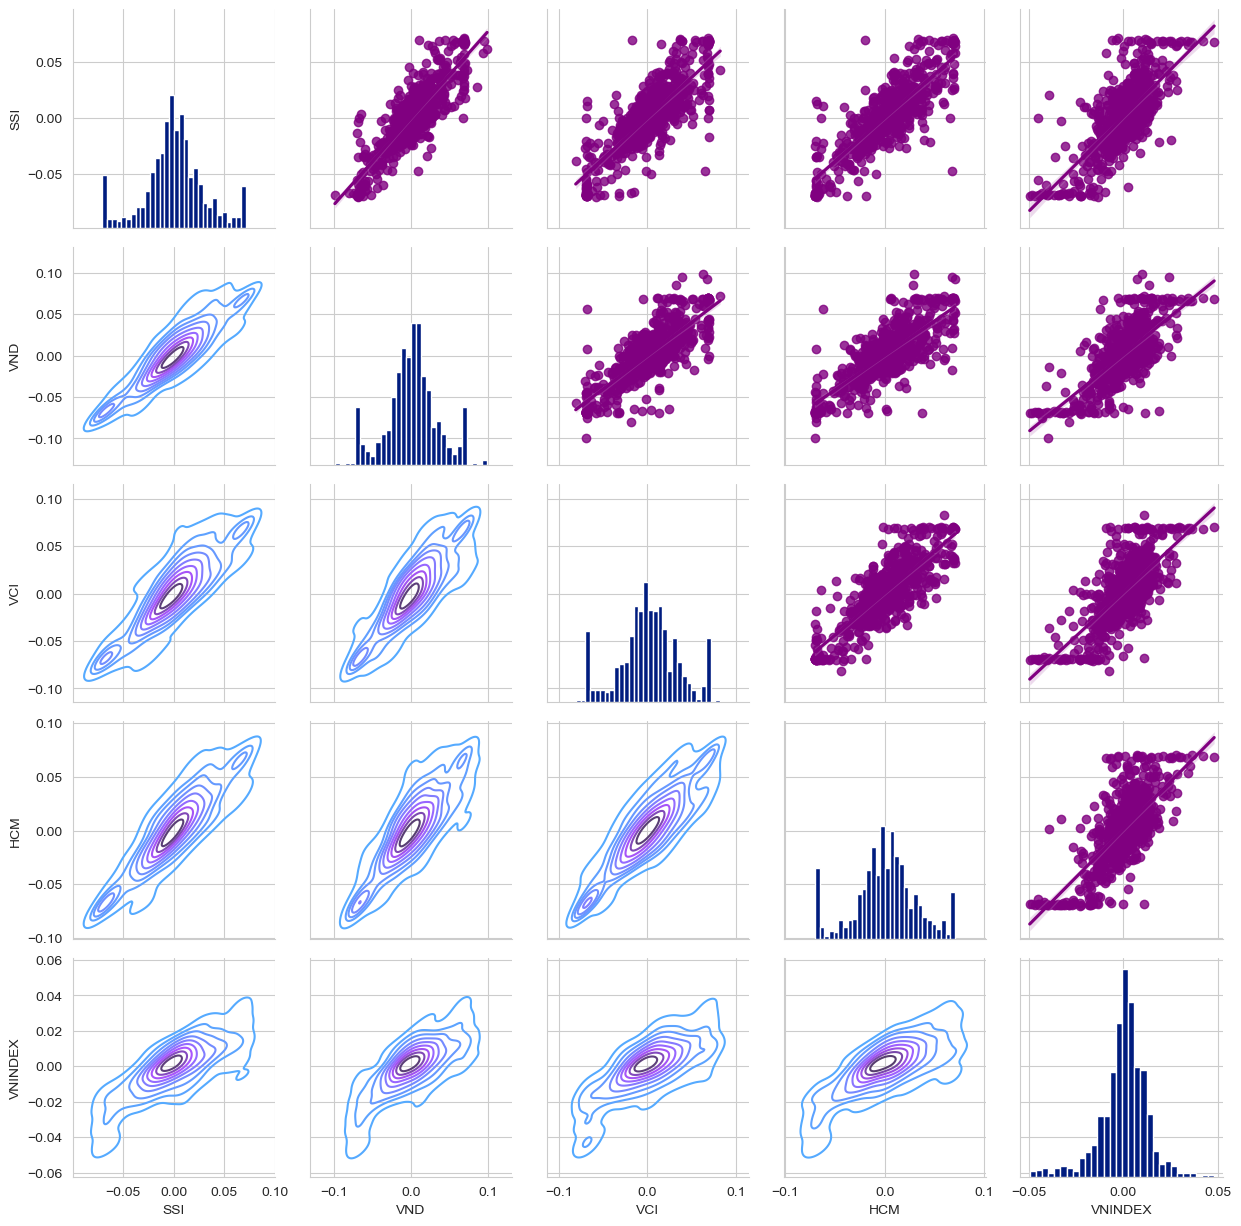

<Figure size 12800x9600 with 0 Axes>

In [23]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(stock_rets.reset_index().dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(sns.regplot, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)
output_file_path = 'corr_return.png'
plt.savefig(output_file_path, format='png', bbox_inches='tight')
plt.figure(dpi=2000)

Dựa theo biểu đồ mối tương quan về tỷ suất sinh lợi hằng ngày 3 năm từ 05/2021 đến 05/2024 của 4 cổ phiếu cùng với chỉ số VNINDEX:
- Phân phối của tỷ suất sinh lời theo ngày của chỉ số VNINDEX gần với phân phối chuẩn.
- Biểu đồ tuyến tính cho thấy đường hồi quy nhỏ nhất (OLS) có độ dốc cao, chỉ ra mối quan hệ tuyến tính mạnh mẽ. Biểu đồ phân tán của 4 công ty cũng cho thấy mức độ phân tán không quá lớn. Từ hai đặc điểm này, có thể nhận thấy rằng các giá trị tỷ suất sinh lời hàng ngày của 4 cổ phiếu này đều có mối quan hệ tuyến tính đồng biến chặt chẽ với nhau và đồng thời đồng biến với tỷ suất sinh lời hàng ngày của thị trường.


<Figure size 12800x9600 with 0 Axes>

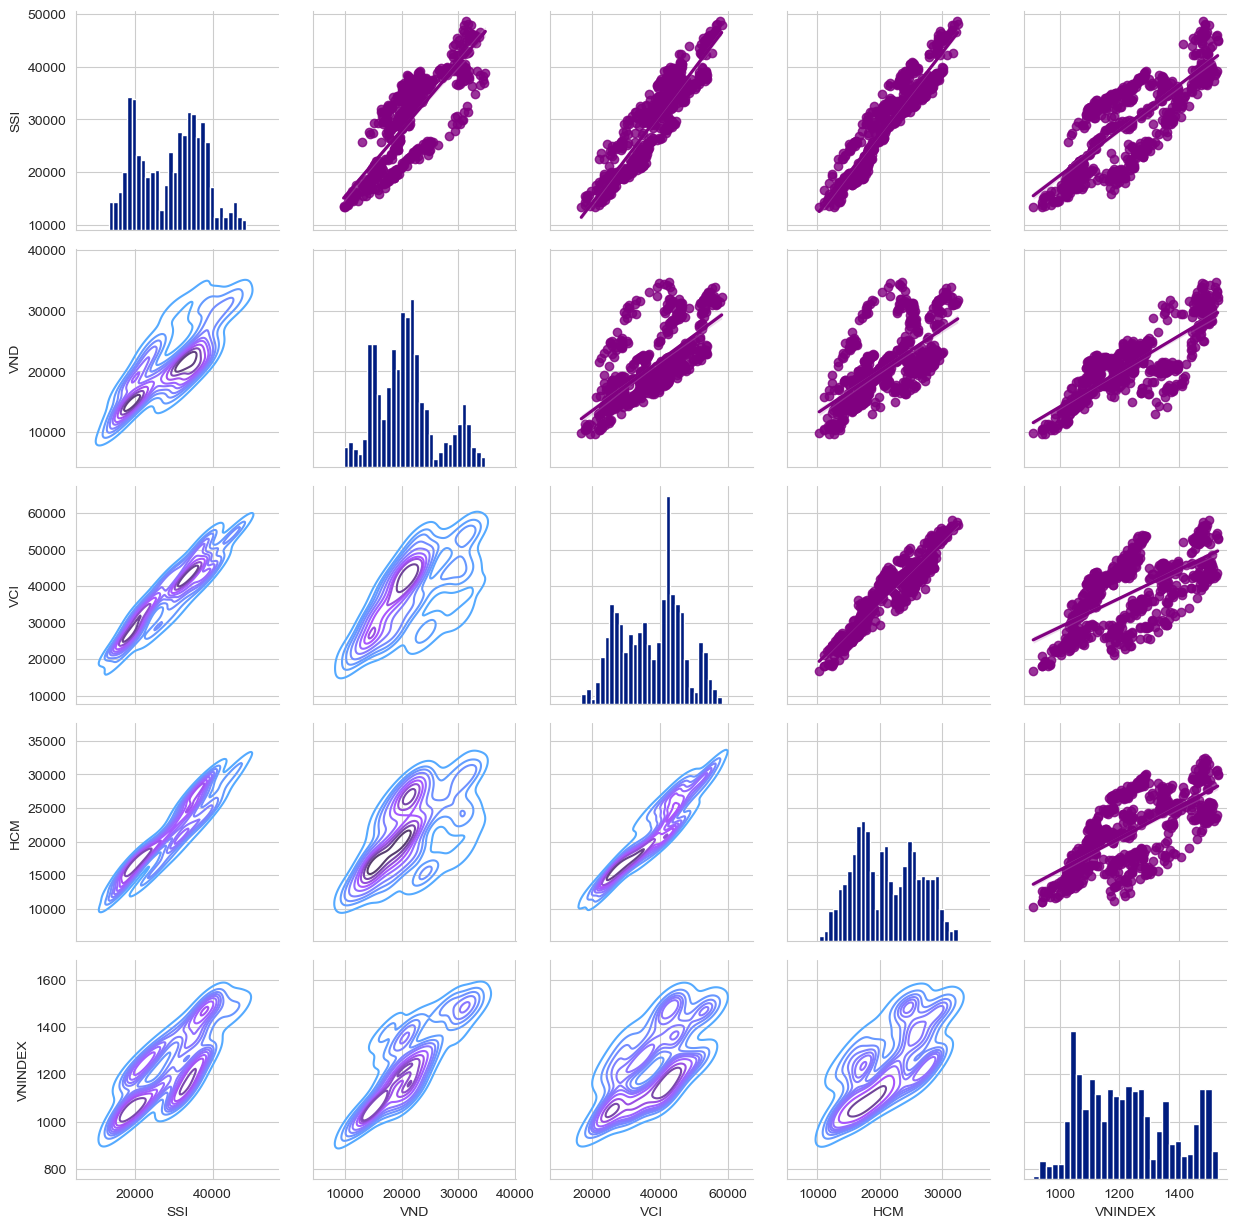

<Figure size 12800x9600 with 0 Axes>

In [24]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(closing_df.reset_index())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(sns.regplot, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)
output_file_path = 'corr_closing.png'
plt.savefig(output_file_path, format='png', bbox_inches='tight')
plt.figure(dpi=2000)

Dựa theo biểu đồ mối tương quan về giá đóng cửa 3 năm từ 05/2021 đến 05/2024 của 4 cổ phiếu cùng với chỉ số VNINDEX: 

-  Phân phối giá đóng cửa của VCI, HCM, VNINDEX tương đối đều trong 3 năm qua, nhưng ta có thể thấy giá đóng cửa của VCI có một giá trị yếu vị lớn hơn gần bằng 40000 đồng (Hay còn gọi là Mode, dùng để chỉ một hoặc khoảng giá trị xuất hiện nhiều nhất trong tập dữ liệu) có tần suất cao đột biến so với các giá trị còn lại. 

-  Biểu đồ phân phối của SSI có hai đỉnh chính tại các giá trị xung quanh 20,000 đồng và 30,000 đồng, và biểu đồ của VND cũng có hai đỉnh chính tại các giá trị xung quanh 20,000 và giá trị thấp hơn ở mức xung quanh 30,000 đồng. Điều này cho thấy rằng dữ liệu có hai 'đỉnh' hoặc 'modes', tức là có hai giá trị xuất hiện nhiều nhất trong dữ liệu. Loại phân phối này được gọi là phân phối đỉnh kép hoặc phân phối bimodal. 

-  Các giá đóng cửa của 4 cổ phiếu này đều có mối quan hệ tuyển tính đồng biến với nhau và đồng biến với chỉ số thị trường. 

-  Các giá đóng cửa của 4 cổ phiếu này đều có mối quan hệ tuyến tính đồng biến với nhau và đồng biến với chỉ số thị trường. 

-  Qua biểu đồ phân tán, ta thấy giá đóng cửa của cổ phiếu VND có mức độ phân tán khá rộng so với giá đóng cửa của 3 công ty còn lại và chỉ số VNINDEX. Tương tự như VND, VNINDEX cũng phân tán rộng với 4 mã cổ phiếu.


In [25]:
stock_rets.corr()

SSI  VND  VCI  HCM  VNINDEX
SSI     1.00 0.87 0.82 0.84     0.73
VND     0.87 1.00 0.81 0.80     0.72
VCI     0.82 0.81 1.00 0.84     0.71
HCM     0.84 0.80 0.84 1.00     0.72
VNINDEX 0.73 0.72 0.71 0.72     1.00

In [26]:
closing_df.corr()

SSI  VND  VCI  HCM  VNINDEX
SSI     1.00 0.81 0.93 0.94     0.79
VND     0.81 1.00 0.70 0.66     0.83
VCI     0.93 0.70 1.00 0.95     0.66
HCM     0.94 0.66 0.95 1.00     0.71
VNINDEX 0.79 0.83 0.66 0.71     1.00

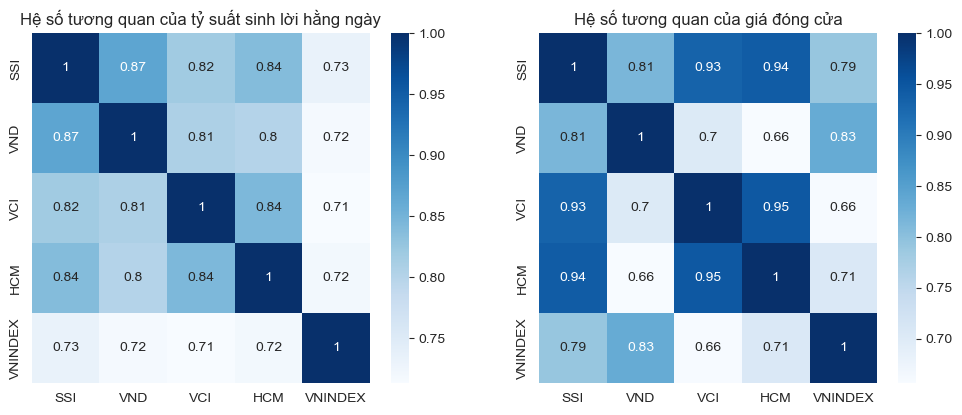

In [27]:
import seaborn as sns

plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(stock_rets.corr(), annot=True, cmap='Blues')
plt.title('Hệ số tương quan của tỷ suất sinh lời hằng ngày')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='Blues')
plt.title('Hệ số tương quan của giá đóng cửa')

output_file_path = 'corr_return_close.png'
plt.savefig(output_file_path, format='png', bbox_inches='tight')

#plt.figure(dpi=200)
plt.show()


oán Việt Nam.


Dựa theo bản đồ nhiệt hệ số tương quan về tỷ suất sinh lợi hằng ngày và giá đóng cửa của 4 cổ phiếu cùng với chỉ số VNINDEX: 

Tỷ suất sinh lời hàng ngày: 

- SSI có mối tương quan mạnh mẽ với VND (0.87), VCI (0.82), và HCM (0.84). Điều này có nghĩa là khi tỷ suất sinh lời hàng ngày của SSI thay đổi, tỷ suất sinh lời hàng ngày của VND, VCI, và HCM cũng có xu hướng thay đổi theo cùng một hướng. 

- Tương tự, VNINDEX có mối tương quan mạnh với SSI (0.73), VND (0.72), VCI (0.71), và HCM (0.72). Điều này cho thấy rằng chỉ số VNINDEX có thể phản ánh một phần sự biến động của tỷ suất sinh lời hàng ngày của các công ty chứng khoán này. 

Giá đóng cửa: 

- SSI có mối tương quan mạnh mẽ với VCI (0.93) và HCM (0.94). Điều này có nghĩa là khi giá đóng cửa của SSI thay đổi, giá đóng cửa của VCI và HCM cũng có xu hướng thay đổi theo cùng một hướng. 

- VNINDEX có mối tương quan mạnh với SSI (0.79) và VND (0.83), nhưng yếu hơn với VCI (0.66) và HCM (0.71). Điều này cho thấy rằng chỉ số VNINDEX có thể phản ánh một phần sự biến động của giá đóng cửa của SSI và VND, nhưng không phản ánh đầy đủ sự biến động của VCI và HCM. 

Tóm lại, thông qua việc phân tích và trực quan hóa dữ liệu, có thể thấy rằng các cổ phiếu của các công ty chứng khoán lớn tại Việt Nam có mối quan hệ chặt chẽ với nhau và với chỉ số VNINDEX, phản ánh sự phụ thuộc lẫn nhau và ảnh hưởng đối với nhau trong biến động giá cổ phiếu và tỷ suất sinh lời hàng ngày. Điều này cung cấp thông tin quý giá cho các nhà đầu tư và phân tích viên trong việc đánh giá rủi ro và cơ hội đầu tư trên thị trường chứng khoán Việt Nam.


<Figure size 12800x9600 with 0 Axes>

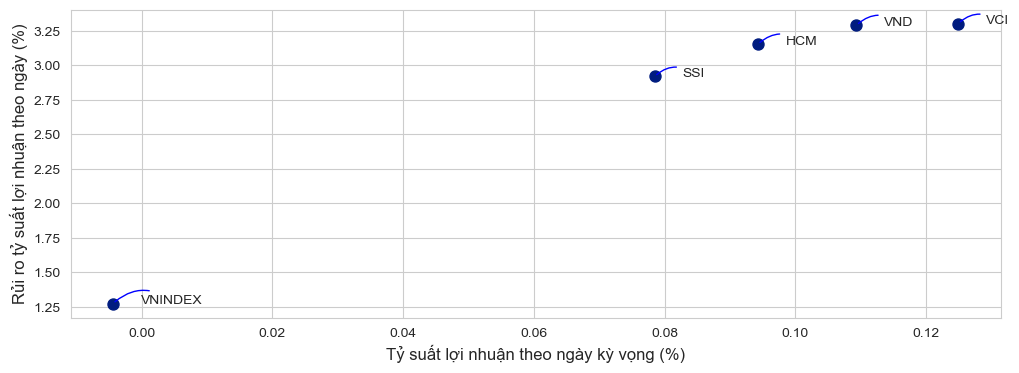

<Figure size 12800x9600 with 0 Axes>

In [28]:
rets = stock_rets.dropna()*100

area = np.pi * 20

plt.figure(figsize=(12, 4))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Tỷ suất lợi nhuận theo ngày kỳ vọng (%)', fontsize = 12)
plt.ylabel('Rủi ro tỷ suất lợi nhuận theo ngày (%)', fontsize = 12)

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(20, 0), 
                 textcoords='offset points', 
                 arrowprops=dict(arrowstyle='-', 
                                 color='blue', 
                                 connectionstyle='arc3,rad=0.4')
                )
output_file_path = 'return_mean_std.png'
plt.savefig(output_file_path, format='png', bbox_inches='tight')
plt.figure(dpi=2000)

# Dự đoán chỉ số VNINDEX:


Trong phần này, tôi sẽ áp dụng các phương pháp dự đoán chuỗi thời gian để dự 
đoán chỉ số VNINDEX. dư)

In [29]:
#end = datetime.now()
end = datetime(2024, 6, 5)
start = datetime(end.year - 3, end.month, end.day)

start = start.strftime('%Y-%m-%d')
end = end.strftime('%Y-%m-%d')

data = vn.stock_historical_data("VNINDEX", start, end, "1D", "index").set_index("time")
data


open    high     low   close     volume   ticker
time                                                          
2021-06-07 1374.80 1375.74 1347.21 1358.78  872809900  VNINDEX
2021-06-08 1355.36 1364.48 1318.11 1319.88  921420544  VNINDEX
2021-06-09 1323.52 1339.14 1312.08 1332.90  818482876  VNINDEX
2021-06-10 1332.90 1336.71 1317.49 1323.58  719836672  VNINDEX
2021-06-11 1326.79 1352.47 1322.08 1351.74  729930560  VNINDEX
...            ...     ...     ...     ...        ...      ...
2024-04-25 1206.52 1208.41 1200.21 1204.97  549032832  VNINDEX
2024-04-26 1199.60 1216.60 1198.73 1209.52  617209408  VNINDEX
2024-05-02 1212.13 1216.36 1206.28 1216.36  561159296  VNINDEX
2024-05-03 1219.75 1225.75 1219.69 1221.03  619471808  VNINDEX
2024-05-06 1227.25 1241.58 1224.22 1241.58  836769600  VNINDEX

[722 rows x 6 columns]

In [30]:
# Drop duplicate indices

data = data.loc[~data.index.duplicated(keep='first')]  

# Set the frequency to daily and forward fill missing values

data = data.asfreq('D', method='ffill')

data.close

time
2021-06-07   1358.78
2021-06-08   1319.88
2021-06-09   1332.90
2021-06-10   1323.58
2021-06-11   1351.74
               ...  
2024-05-02   1216.36
2024-05-03   1221.03
2024-05-04   1221.03
2024-05-05   1221.03
2024-05-06   1241.58
Freq: D, Name: close, Length: 1065, dtype: float64

In [31]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [32]:
sns.set_style('whitegrid')
plt.style.use('seaborn-v0_8-dark-palette')

Trước tiên tôi thực hiện phân tích phân rã (decomposition) theo mô hình nhân của chuỗi thời gian để hiểu sâu thêm thành phần của chuỗi dữ liệu. 

Phân tích phân rã giúp chia nhỏ chuỗi thời gian thành các thành phần chính như trend (xu hướng), seasonality (mùa vụ), và residue (phần dư).

## Tách các thành phần chuỗi thời gian chỉ số VNINDEX:

<Figure size 640x480 with 0 Axes>

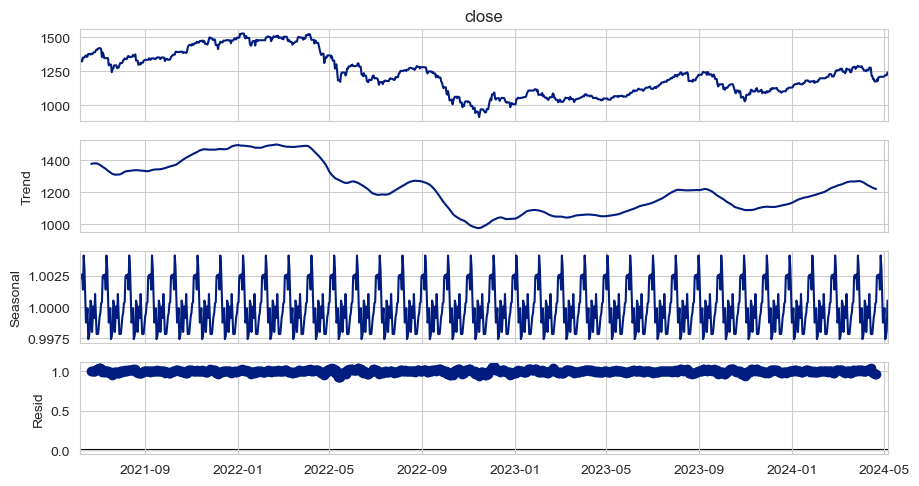

<Figure size 5120x3840 with 0 Axes>

In [33]:
# Checking decomposition of trend, seasonality and residue of the original time series.
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

decomposition = seasonal_decompose(data['close'], 
                                       model='multiplicative', 
                                       period=30)

fig = plt.figure()  
fig = decomposition.plot()
plt.figure(dpi=800)
fig.set_size_inches(10, 5)

plt.show()  # Display the plot


output_file_path = 'seasonal_decompose.png'
fig.savefig(output_file_path, format='png', bbox_inches='tight')

plt.close(fig)  # Close the plot


Dữ liệu chỉ số VNINDEX có yếu tố xu hướng và yếu tố mùa vụ qua biểu đồ trên.SS.

Để phù hợp với mô hình thì dữ liệu đầu vào của mình phải là một dữ liệu ổn định (stationary), do đó ta cần phải kiểm tra dữ liệu của mình thông qua các kiểm định về tính ổn định đó là kiểm định ADF và KPSS.

## Kiểm định nghiệm đơn vị (Unit root test):

ADF Test:
Null Hypothesis: Not Stationary
ADF Statistic: -1.534492
p-value: 0.516385
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568
KPSS Test:
Null Hypothesis: Stationary
KPSS Statistic: 2.796202
p-value: 0.010000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


C:\Users\Admin\AppData\Local\Temp\ipykernel_9284\771900697.py:36: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test = kpss(stock_close_price, regression='c', nlags=None, store=False)


<Figure size 2400x600 with 0 Axes>

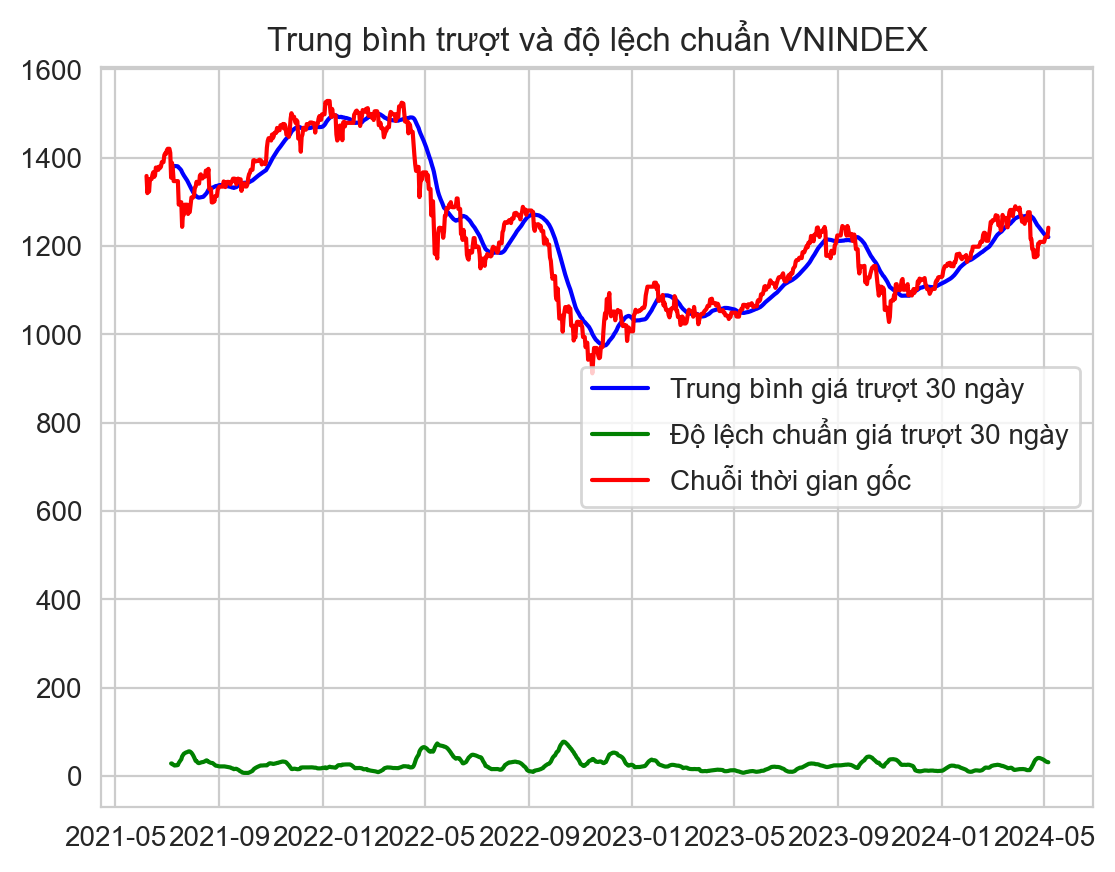

In [34]:
#Testing for stationarity using ADF and KPSS Tests.
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

def stationarity_test(stock_close_price):
    # Calculating rolling mean and rolling standard deviation:
    rolling_mean = stock_close_price.rolling(30).mean()
    rolling_std_dev = stock_close_price.rolling(30).std()
  
    # Plotting the statistics:
    plt.figure(figsize=(24,6))
    plt.figure(dpi=200)
    plt.plot(rolling_mean, color='blue', label='Trung bình giá trượt 30 ngày')
    plt.plot(rolling_std_dev, color='green', label = 'Độ lệch chuẩn giá trượt 30 ngày')
    plt.plot(stock_close_price, color='red',label='Chuỗi thời gian gốc')
    plt.legend(loc='best'
              #, fontsize = 14
              )
    plt.title('Trung bình trượt và độ lệch chuẩn VNINDEX'
              #,fontsize = 16 
             )
    output_file_path = 'rolling_mean_std_close_VNINDEX.png'
    plt.savefig(output_file_path, format='png', bbox_inches='tight')
    #plt.figure(dpi=200)
    
    print("ADF Test:")
    adf_test = adfuller(stock_close_price,autolag='AIC')
    print('Null Hypothesis: Not Stationary')
    print('ADF Statistic: %f' % adf_test[0])
    print('p-value: %f' % adf_test[1])
    print('Critical Values:')
    for key, value in adf_test[4].items():
        print('\t%s: %.3f' % (key, value))

    print("KPSS Test:")
    kpss_test = kpss(stock_close_price, regression='c', nlags=None, store=False)
    print('Null Hypothesis: Stationary')
    print('KPSS Statistic: %f' % kpss_test[0])
    print('p-value: %f' % kpss_test[1])
    print('Critical Values:')
    for key, value in kpss_test[3].items():
        print('\t%s: %.3f' % (key, value))
    
stationarity_test(data['close'])

# PACF Plot
#from statsmodels.graphics.tsaplots import plot_pacf
#acf = plot_acf(data['close'].dropna(), lags=30)

- ADF Test (Augmented Dickey-Fuller): Giá trị p lớn hơn mức ý nghĩa 0.05, vì vậy chúng ta không thể bác bỏ giả thuyết không (Not Stationary). 
- KPSS Test (Kwiatkowski-Phillips-Schmidt-Shin): Giá trị p nhỏ hơn mức ý nghĩa 0.05, vì vậy chúng ta bác bỏ giả thuyết không ( Stationary). 


Theo biểu đồ ta có độ lệch chuẩn biến động mạnh và kết quả của 2 kiểm định giả thuyết trên đều cũng cố cho chuỗi dữ liệu chỉ số VNINDEX 5/2021-5/2024 là không có tính dừng (stationary). Do đó ta cần phải biến đổi dữ liệu về dạng chuỗi dữ liệu có tính dừng.

Ta có thể thấy chuỗi dữ liệu có yếu tố xu hướng và yếu tố mùa vụ nên tôi sẽ làm mịn dữ liệu bằng cách lấy giá trị hiện tại trừ cho giá trị một ngày trước ( hay còn gọi là phương pháp “Differencing”) để cho ra một dữ liệu có tính dừng hơn

In [35]:

data['Close_Log'] = np.log(data['close'])
#data['Close_Detrend_30'] = (data['close'] - data['close'].shift(30))
data['Close_Detrend_1'] = (data['close'] - data['close'].shift(1))
#data['Close_Detrend'] = data['Close_Detrend'].dropna()
#data['Close_Detrend_30_log'] = (data['Close_Log'] - data['Close_Log'].shift(30))
data['Close_Detrend_1_log'] = (data['Close_Log'] - data['Close_Log'].shift(1))

ADF Test:
Null Hypothesis: Not Stationary
ADF Statistic: -14.851747
p-value: 0.000000
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568
KPSS Test:
Null Hypothesis: Stationary
KPSS Statistic: 0.134848
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


C:\Users\Admin\AppData\Local\Temp\ipykernel_9284\3837832.py:29: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(stock_close_price, regression='c', nlags=None, store=False)


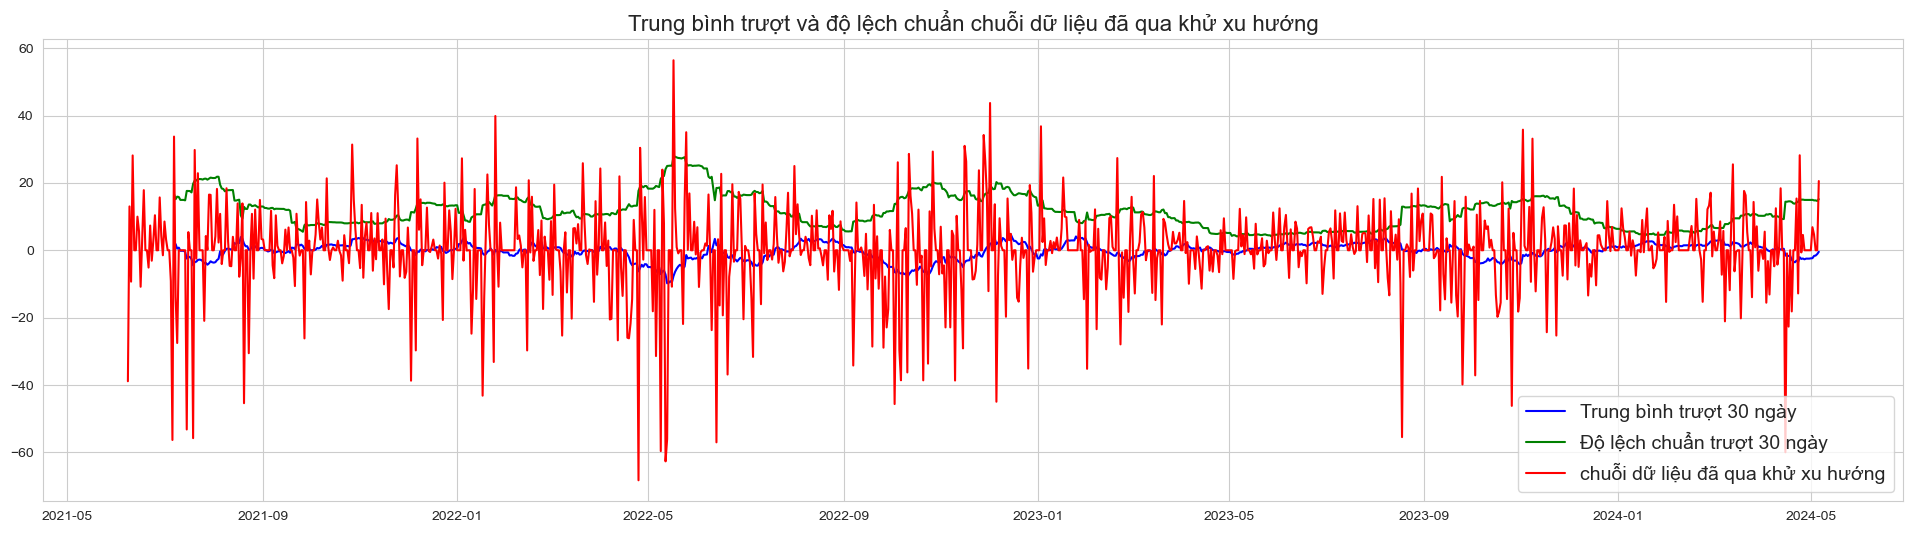

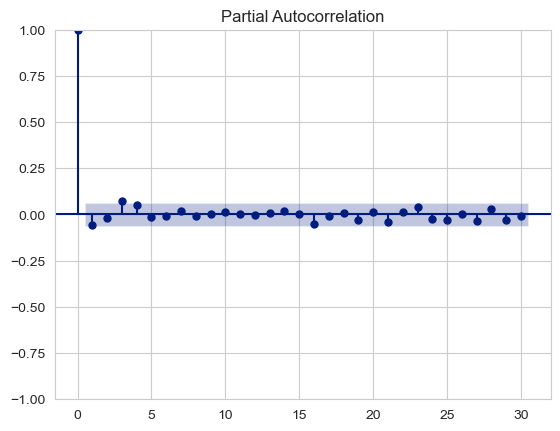

In [36]:
#Testing for stationarity of de-trended time series using ADF and KPSS Tests.
def stationarity_test(stock_close_price):
    # Calculating rolling mean and rolling standard deviation:
    rolling_mean = stock_close_price.rolling(30).mean()
    rolling_std_dev = stock_close_price.rolling(30).std()
  
    # Plotting the statistics:
    plt.figure(figsize=(24,6))
    #plt.figure(dpi=200)
    plt.plot(rolling_mean, color='blue', label='Trung bình trượt 30 ngày')
    plt.plot(rolling_std_dev, color='green', label = 'Độ lệch chuẩn trượt 30 ngày')
    plt.plot(stock_close_price, color='red',label='chuỗi dữ liệu đã qua khử xu hướng')
    plt.legend(loc='best', fontsize = 14)
    plt.title('Trung bình trượt và độ lệch chuẩn chuỗi dữ liệu đã qua khử xu hướng', fontsize = 16)
    output_file_path = 'rolling_mean_std_close_detrend_VNINDEX.png'
    plt.savefig(output_file_path, format='png', bbox_inches='tight')
    #plt.figure(dpi=2000)
    
    print("ADF Test:")
    adf_test = adfuller(stock_close_price,autolag='AIC')
    print('Null Hypothesis: Not Stationary')
    print('ADF Statistic: %f' % adf_test[0])
    print('p-value: %f' % adf_test[1])
    print('Critical Values:')
    for key, value in adf_test[4].items():
        print('\t%s: %.3f' % (key, value))

    print("KPSS Test:")
    kpss_test = kpss(stock_close_price, regression='c', nlags=None, store=False)
    print('Null Hypothesis: Stationary')
    print('KPSS Statistic: %f' % kpss_test[0])
    print('p-value: %f' % kpss_test[1])
    print('Critical Values:')
    for key, value in kpss_test[3].items():
        print('\t%s: %.3f' % (key, value))

stationarity_test(data['Close_Detrend_1'].dropna())

# PACF Plot
from statsmodels.graphics.tsaplots import plot_pacf
pacf = plot_pacf(data['Close_Detrend_1'].dropna(), lags=30)
#

- ADF Test (Augmented Dickey-Fuller): Giá trị p nhỏ hơn cả 3 mức ý nghĩa 0,05 và 0,01. Vì vậy chúng ta có đủ bằng chứng mang ý nghĩa thống kê để bác bỏ giả thuyết không. 

- KPSS Test (Kwiatkowski-Phillips-Schmidt-Shin): Giá trị p lớn hơn mức ý nghĩa 0.05, vì vậy chúng ta chưa thể bác bỏ giả thuyết không.

Qua hai kết quả trên, ta có thể kết luận chuỗi dữ liệu đã qua xử lý là chuỗi dữ liệu đã có tính dừng. Vì vậy khi áp dụng mô hình định giá ARIMA (p, d, q) thì ta sẽ chọn d = 1 tương ứng với khử theo một ngày để dữ liệu có tính dừng. 

## Áp dụng mô hình ARIMA để dự đoán xu hướng chỉ số VNINDEX:


Đầu tiên, tôi chia chuỗi dữ liệu thành 2 tập dữ liệu khác nhau theo tỷ trong 90/10. Tôi chia 90% chuỗi dữ liệu VNINDEX lấy từ 05/2021 trở về trước để làm tập dữ liệu huấn luyện mô hình, còn 10% còn lại (106 ngày) lấy từ 05/2024 trở về sau làm tập dữ liệu kiểm tra hiệu suất dự đoán của mô hình.

In [107]:
Stock_data_arima = data['close'].dropna()
print(round(0.1*len(Stock_data_arima)))

106


<Figure size 12800x9600 with 0 Axes>

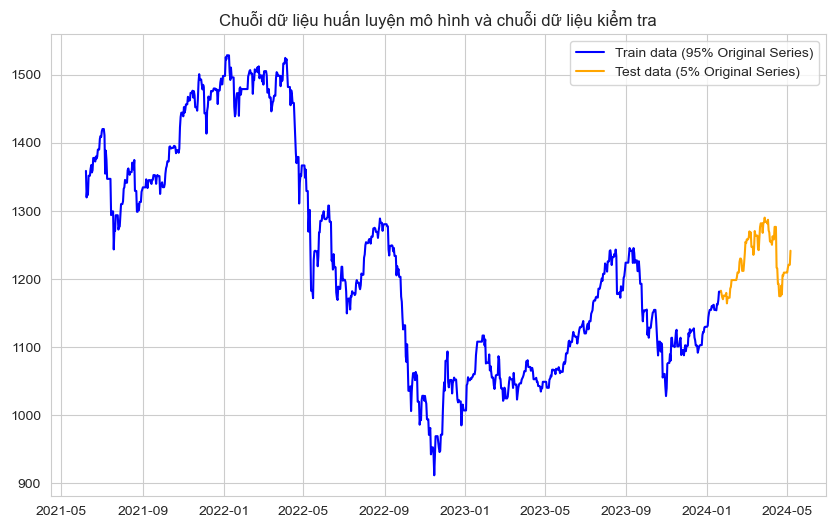

<Figure size 12800x9600 with 0 Axes>

In [130]:
#split data into train and training set
Stock_data_arima = data['close'].dropna()
test_size = round(0.1*len(Stock_data_arima))
#test_size = 30
train_data, test_data = Stock_data_arima[:-test_size], Stock_data_arima[-test_size:]


# Plotting the train and test sets.
plt.figure(figsize=(10,6))
#plt.xlabel('Year')
#plt.ylabel('Closing Price')
plt.plot(train_data, 'blue', label='Train data (95% Original Series)')
plt.plot(test_data, 'orange', label='Test data (5% Original Series)')
plt.legend()
plt.title('Chuỗi dữ liệu huấn luyện mô hình và chuỗi dữ liệu kiểm tra')

output_file_path = 'train_test.png'
plt.savefig(output_file_path, format='png', bbox_inches='tight')
plt.figure(dpi=2000)

Tôi sẽ sử dụng phương pháp Auto ARIMA để tự động lựa chọn các tham số phù hợp 
cho mô hình ARIMA khi huấn luyện dữ liệu để dự đoán chuỗi thời gian. Điều này giúp
giảm bớt công việc tìm kiếm thủ công tham số và tối ưu hóa hiệu suất của mô hình. Vớ 
các thông số “p” và “q” chạy từ 0 đến 3 để chọn ra mô hình có AIC (Tiêu chí thông tn 
Akaike) thấp nhất

In [137]:
from pmdarima import auto_arima
from math import *
from statsmodels.tsa.arima.model import ARIMA


In [138]:

# Tìm mô hình ARIMA tối ưu bằng auto_arima
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      m=1,              # tần suất của chuỗi: mỗi tháng
                      d=1,              # chọn theo phương pháp differecing
                      seasonal=True,
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=False)

print(model_autoARIMA.summary())



 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=7613.735, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=7612.036, Time=0.32 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=7613.678, Time=0.46 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=7606.653, Time=0.53 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=7607.438, Time=0.69 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=7609.404, Time=0.88 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=7612.240, Time=0.28 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=7613.948, Time=0.72 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=7613.347, Time=1.33 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=7607.623, Time=1.14 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=7609.411, Time=1.68 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=7613.038, Time=0.41 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=7612.876, Time=1.07 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=7610.260, Time=1.99 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=7609.532, Time=1.65 sec
 ARIMA(3,1

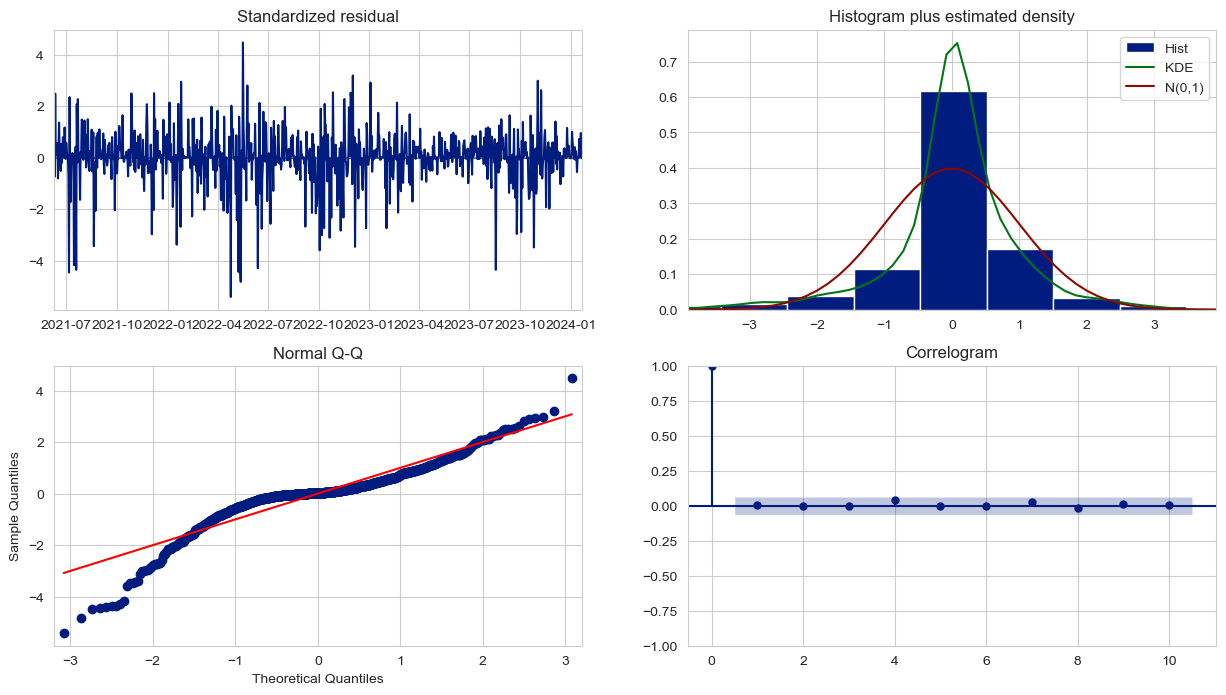

In [139]:

model_autoARIMA.plot_diagnostics(figsize=(15,8))

# Save the plot as a PNG file
output_file_path = 'ARIMA_Diagnostics.png'
plt.savefig(output_file_path, format='png', bbox_inches='tight')

# Show the plot (optional)
plt.show()
plt.close()

5


Từ kết quả trên, ta có thể nhận xét các ý sau:
- Mô hình tốt nhất được chọn là ARIMA(0,1,3)(0,0,0)[1].
- Hệ số của độ trễ MA L1 và L3 có ý nghĩa thống kê với giá trị p nhỏ hơn 0.05


#### Biểu đồ chuẩn đoán:

- Standardized Residuals: Biểu đồ này thể hiện các giá trị dư chuẩn hóa theo thời gian (từ năm 2021 đến 2024). Nếu không có xu hướng hay mô hình nào trong dữ liệu (nghĩa là dữ liệu ngẫu nhiên), ta có thể mong đợi rằng giá trị dư sẽ không có mô hình và sẽ không có sự tự tương quan. Trong trường hợp này, cho thấy không có mô hình rõ ràng trong các giá trị dư.

- Histogram Plus Estimated Density: Biểu đồ này thể hiện phân phối của các giá trị dư. Nếu mô hình đã khớp tốt, chúng ta mong đợi rằng giá trị dư sẽ tuân theo phân phối chuẩn. Trong trường hợp này, cho thấy giá trị dư có phân phối gần với phân phối chuẩn, mặc dù có một số sai lệch nhỏ.

- Normal Q-Q: Biểu đồ này so sánh phân phối của các giá trị dư với phân phối chuẩn. Nếu các điểm nằm gần với đường thẳng màu đỏ, điều này cho thấy giá trị dư tuân theo phân phối chuẩn. Trong trường hợp này, các điểm nằm khá gần với đường thẳng màu đỏ nhưng có một số sai lệch lớn ở đuôi, cho thấy giá trị dư có phân phối không phải là phân phối chuẩn.

- Correlogram: Biểu đồ này thể hiện sự tự tương quan của các giá trị dư ở các độ trễ khác nhau. Nếu không có sự tự tương quan, chúng ta mong đợi rằng tất cả các thanh sẽ nằm trong vùng màu xanh lá cây (vùng tin cậy 95%). Trong trường hợp này, hầu hết các thanh đều nằm trong vùng màu xanh lá cây, cho thấy không có sự tự tương quan trong các giá trị dư, điều này gợi ý rằng sai số là biến ngẫu nhiên (white noise).

Tóm lại, dựa trên các biểu đồ chuẩn đoán này, mô hình ARIMA có vẻ đã khớp khá tốt với dữ liệu VNINDEX.


In [140]:
prediction, confint = model_autoARIMA.predict(n_periods= test_size, alpha=0.05, return_conf_int=True)


In [141]:
cf= pd.DataFrame(confint)

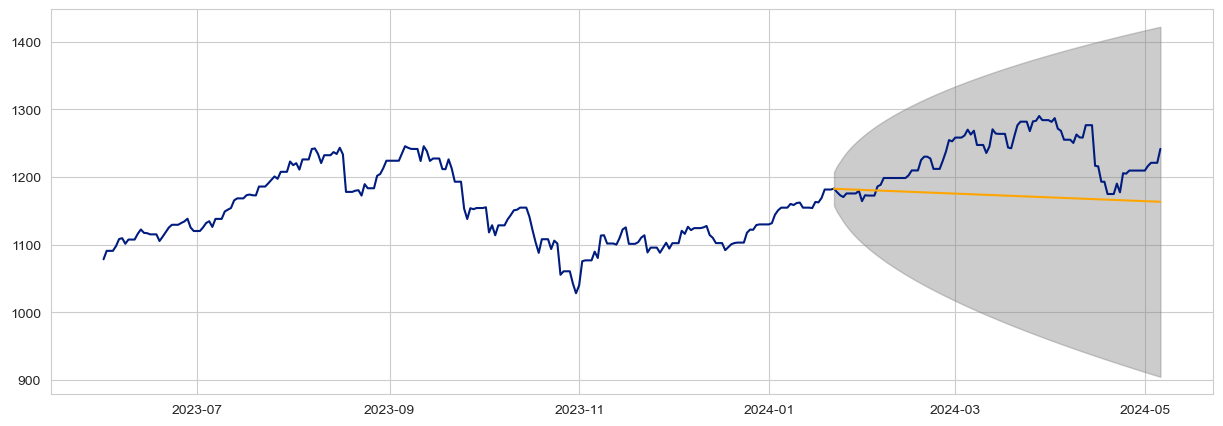

In [142]:
prediction_series = pd.Series(prediction,index=test_data.index)
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(Stock_data_arima.last('12M'))

ax.plot(prediction_series, color = 'orange')
ax.fill_between(prediction_series.index,
                cf[0],
                cf[1],color='grey',alpha=.4)
# Save the plot as a PNG file
output_file_path = 'ARIMA_TEST.png'
plt.savefig(output_file_path, format='png', bbox_inches='tight')

# Show the plot (optional)
plt.show()

In [136]:
ax.plot(Stock_data_arima.last('12M'))
plt.show()

In [143]:
mape = np.mean(np.abs(prediction_series - test_data) / np.abs(test_data))
#mape = mape
print('MAPE: ' + str(mape))

MAPE: 0.04580673172116657


Ta có thể thấy rằng đường màu cam đại diện cho giá trị dự đoán cùng với khoảng tin cậy 95% đã dự đoán đúng xu hướng dài hạn 3 tháng đi ngang của dữ liệu nhưng không đoán được cổ phiếu biến động tăng hay giảm trong thời gian ngắn hơn trước đó.

Sau khi huấn luyện mô hình, ta cần thẩm định kết quả để đánh giá hiệu suất của mô hình. Trong trường hợp này, tôi dùng chỉ số MAPE (Mean Absolute Percentage Error -Trung bình phần trăm chênh lệch tuyệt đối) để nhận định hiệu quả của mô hình dự đoán. Với kích thước tập dữ liệu mẫu 10% là 106 ngày thì giá trị MAPE tôi tính được là 4,58%. Tức là trung bình mỗi dự đoán sai số khoảng 4,58% so với giá trị thực tế.

In [115]:
model = auto_arima(Stock_data_arima, start_p=0, start_q=0,
                      m=1,              # tần suất của chuỗi: mỗi tháng
                      d=1,              # chọn theo phương pháp differecing
                      seasonal=True,
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=False)

print(model.summary())
#model.plot_diagnostics(figsize=(15, 8))
#plt.show()

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=8422.783, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=8421.144, Time=0.37 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=8423.118, Time=0.56 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=8418.237, Time=0.75 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=8418.761, Time=0.89 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=8420.267, Time=1.27 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=8421.228, Time=0.44 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=8423.137, Time=0.63 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=8422.597, Time=1.41 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=8419.318, Time=1.41 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=8420.444, Time=2.39 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=8422.893, Time=0.77 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=8423.890, Time=1.22 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=8420.459, Time=2.03 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=8420.667, Time=2.14 sec
 ARIMA(3,1

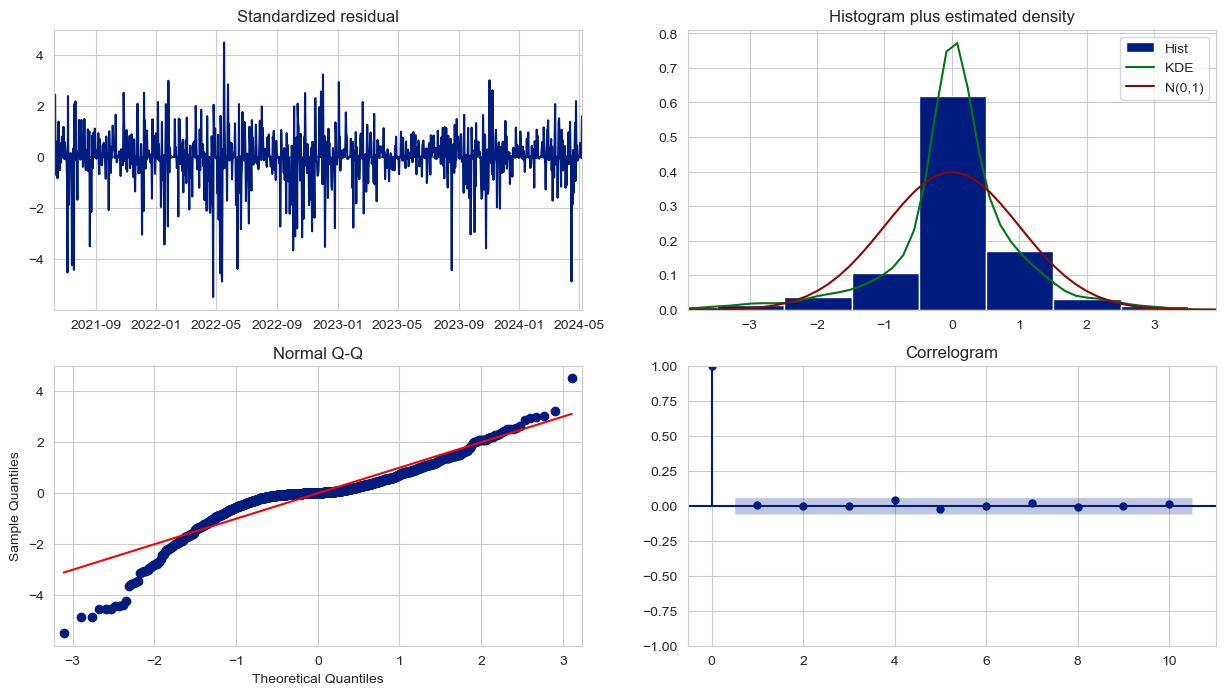

In [116]:
model.plot_diagnostics(figsize=(15, 8))

# Save the plot as a PNG file
output_file_path = 'ARIMA_Diagnostics_Forecast.png'
plt.savefig(output_file_path, format='png', bbox_inches='tight')

# Show the plot (optional)
plt.show()
plt.close()

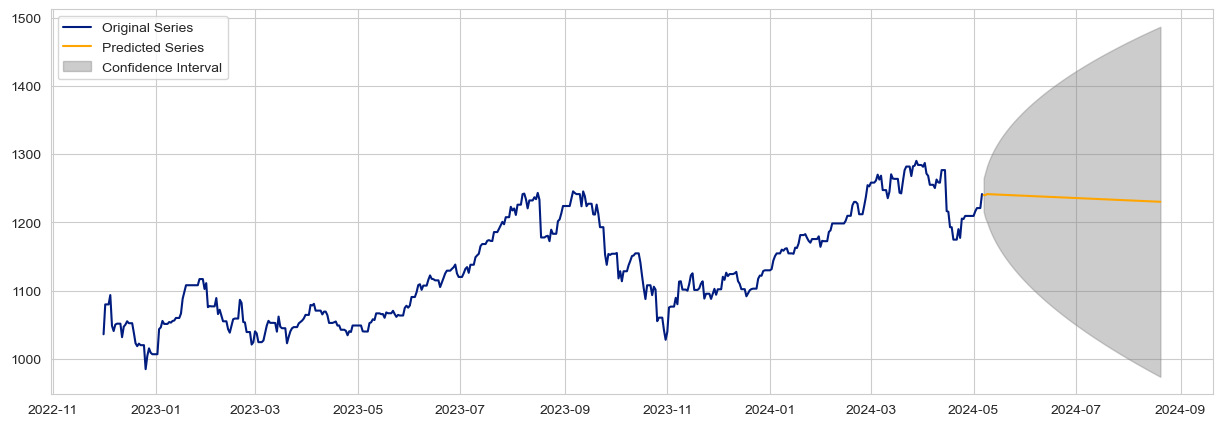

In [117]:
# Predict the next 180 days
forecast, confint = model.predict(n_periods=test_size, 
                                  alpha=0.05, 
                                  return_conf_int=True)

# Create a DataFrame for confidence intervals
cf = pd.DataFrame(confint, columns=['lower', 'upper'])

# Create a time index for the next 180 days
forward_index = pd.date_range(start=Stock_data_arima.index[-1] 
                                    + pd.DateOffset(1), 
                                    periods=test_size)

# Create a Series for the prediction with the new time index
prediction_series = pd.Series(forecast, index=forward_index )

# Plot the original series and the predicted series with confidence intervals
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(Stock_data_arima.last('18M'), label='Original Series')
ax.plot(prediction_series, label='Predicted Series', color = 'orange')
ax.fill_between(prediction_series.index, 
                cf['lower'], cf['upper'], 
                color='grey', alpha=0.4, 
                label='Confidence Interval')
ax.legend(loc = 'upper left')

# Save the plot as a PNG file
output_file_path = 'ARIMA_predict.png'
plt.savefig(output_file_path, format='png', bbox_inches='tight')

# Show the plot (optional)
plt.show()
plt.close()

Từ biểu đồ, mô hình dự phóng cho 106 ngày tiếp theo là xu hướng đi ngang trên 1200 điểm. Tuy nhiên, cần lưu ý rằng mô hình dự đoán dựa trên thông tin trong quá khứ và không thể chắc chắn về tương lai. Mô hình cũng không thể dự đoán được các sự kiện bất ngờ có thể ảnh hưởng đến chỉ số thị trường. Khoảng tin cậy 95% cho thấy mức độ không chắc chắn trong dự đoán này.

Bây giờ ta đã hoàn thành trong việc dự đoán bằng mô hình arima để có được một cái nhìn sâu sắc xu hướng của dữ liệu. Tuy nhiên, xu hướng chỉ là một phần của câu chuyện. Trong thực tế, biến động của chuỗi thời gian cũng rất quan trọng và cần được mô hình hóa một cách chính xác. Đó là lý do tại sao chúng ta cần đến mô hình GARCH để áp dụng dự đoán biến động giá.

## Áp dụng mô hình GARCH(1,1) để dự đoán biến động chỉ số VNINDEX:


In [118]:
returns =  100* data.close.pct_change().dropna()

Text(0.5, 1.0, 'VNINDEX Returns')

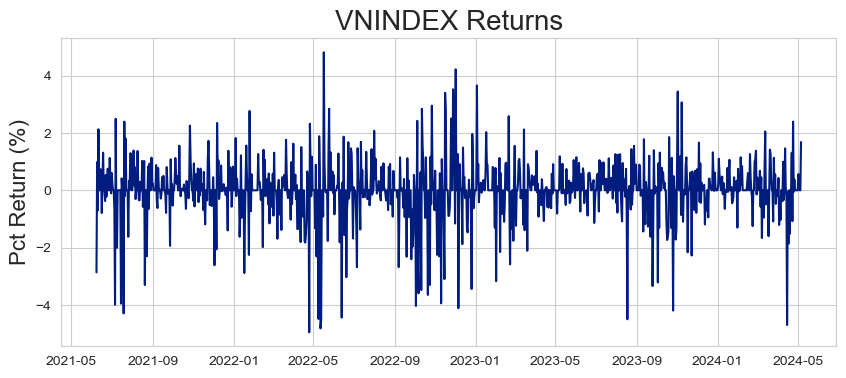

In [119]:

plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return (%)', fontsize=16)
plt.title('VNINDEX Returns', fontsize=20)

Ta sẽ lấy số liệu tỷ suất sinh lợi hằng ngày để huấn luyện cho mô hình GARCH. Trước tiên, ta cần xem qua mối quan hệ của giá trị hiện tại với các giá trị trước đó thông qua biểu đồ PACF (Partial Autocorrelation) của giá trị bình phương tỷ suất sinh lợi hàng ngày

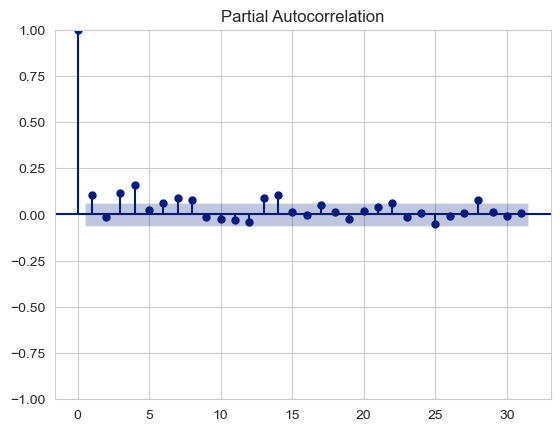

In [120]:
plot_pacf(returns**2)


output_file_path = 'PACF_RET.png'
plt.savefig(output_file_path, format='png', bbox_inches='tight')


plt.show()
plt.close()

Có một đỉnh lớn ở giá trị quan sát trễ 0, điều này là dễ hiểu vì một quan sát luôn có mối tương quan hoàn hảo với chính nó. Giá trị tự tương quan tại độ trễ 1 là thấp hơn 0.25 nhưng cao hơn khoảng tin cậy, điều này có nghĩa là có một mối tương quan tương đối yếu giữa giá trị hiện tại và giá trị một đơn vị thời gian trước đó. Đối với các quan sát trễ khác, hầu hết các điểm dữ liệu cho thấy không có sự tự tương quan đáng kể ởcác độ trễ này. Tóm lại, biểu đồ trên cho thấy Điều này có thể cho thấy rằng biến động hiện tại của giá cổ phiếu ít phụ thuộc vào biến động trong quá khứ ngoại trừ mối tương quan thấp ở độ trễ 1. Do đó mô hình phù hợp với dữ liệu này sẽ là mồ hình GARCH(1,1).


In [121]:
from arch import arch_model
model = arch_model(returns, p=1, q=1)

In [122]:

model_fit = model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1840177312064.2498
Iteration:      2,   Func. Count:     14,   Neg. LLF: 286221.7498132066
Iteration:      3,   Func. Count:     21,   Neg. LLF: 1860.8546039409234
Iteration:      4,   Func. Count:     30,   Neg. LLF: 1478.9073135408005
Iteration:      5,   Func. Count:     36,   Neg. LLF: 1588.7459693182084
Iteration:      6,   Func. Count:     43,   Neg. LLF: 1477.7051694987076
Iteration:      7,   Func. Count:     49,   Neg. LLF: 1471.46314577341
Iteration:      8,   Func. Count:     54,   Neg. LLF: 1471.4618383134602
Iteration:      9,   Func. Count:     59,   Neg. LLF: 1471.461835428614
Iteration:     10,   Func. Count:     63,   Neg. LLF: 1471.4618354285064
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1471.461835428614
            Iterations: 10
            Function evaluations: 63
            Gradient evaluations: 10


In [123]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1471.46
Distribution:                  Normal   AIC:                           2950.92
Method:            Maximum Likelihood   BIC:                           2970.80
                                        No. Observations:                 1064
Date:                Tue, May 07 2024   Df Residuals:                     1063
Time:                        14:56:23   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0429  2.866e-02      1.498      0.134 [-1.324e-02,9.910e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0180  8.612e-03      2.085  3.707e-02 [1.077e-03,3.483e-02]
alpha[1]       0.0565  1.323e-02      4.273  1.925e-05 [3.060e-02,8.245e-02]
beta[1]        0.9280  1.408e-02     65.930      0.000     [  0.900,  0.956]
============================================================================

Covariance estimator: robust
"""

ý nghĩa 0.05.


Dựa trên kết quả của mô hình Constant Mean - GARCH, ta có: 

Mean Model: 

•	Hệ số mu (đại diện cho trung bình): 0.0429, với độ tin cậy 95% nằm trong khoảng từ -0.01324 đến 0.0991. 

•	Giá trị p cho hệ số mu là 0.134, có nghĩa là hệ số không có ý nghĩa đáng kể ở mức ý nghĩa 0.05. 

Volatility Model: 

•	Hệ số omega (đại diện cho thành phần không quan trọng của phương sai): 0.0180, với độ tin cậy 95% nằm trong khoảng từ 0.001077 đến 0.03483. 

•	Giá trị p cho hệ số omega là 0.03707, có nghĩa là hệ số có ý nghĩa đáng kể ở mức ý nghĩa 0.05. 

•	Hệ số alpha[1] (đại diện cho ảnh hưởng của biến động ngày trước đó): 0.0565, với độ tin cậy 95% nằm trong khoảng từ 0.0306 đến 0.08245. 

•	Giá trị p cho hệ số alpha[1] là 1.925e-05, có nghĩa là hệ số có ý nghĩa đáng kể ở mức ý nghĩa 0.05. 

•	Hệ số beta[1] (đại diện cho ảnh hưởng của biến động trong quá khứ): 0.9280, với độ tin cậy 95% nằm trong khoảng từ 0.900 đến 0.956. 

•	Giá trị p cho hệ số beta[1] là 0.000, có nghĩa là hệ số có ý nghĩa đáng kể ở mức ý nghĩa 0.05.


In [124]:
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=1, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [125]:
rolling_predictions = pd.Series(rolling_predictions, 
                                index=returns.index[-365:])

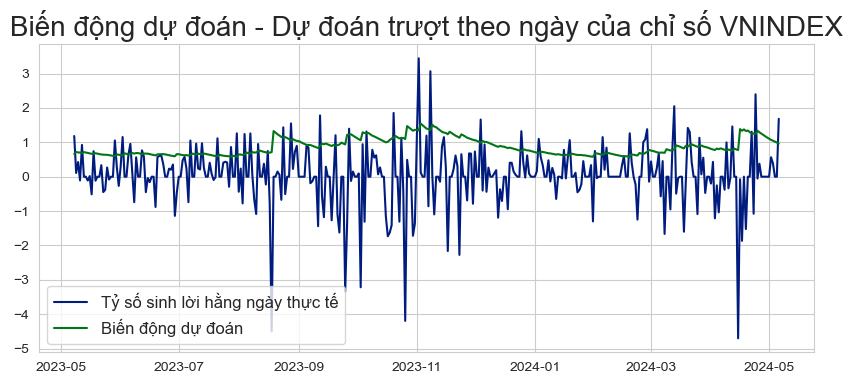

In [126]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365:])
preds, = plt.plot(rolling_predictions)
plt.title('Biến động dự đoán - Dự đoán trượt theo ngày của chỉ số VNINDEX', fontsize=20)
plt.legend(['Tỷ số sinh lời hằng ngày thực tế', 'Biến động dự đoán'],
           loc = 'lower left', fontsize=12)
# Save the plot as a PNG file
output_file_path = 'Garch_roll.png'
plt.savefig(output_file_path, format='png', bbox_inches='tight')

# Show the plot (optional)
plt.show()
plt.close()

Ta có thể thấy về mặt tổng quan mô hình GARCH(1,1) dự đoán khá đúng với biến 
động của tỷ suất sinh lời hằng ngày. Ta có thể thấy biến động dự đoán tăng ở gần 2023
09 thì đồng thời lúc đó tỷ suất sinh lợi tăng đột biến, biến động dự đoán giảm ở gia 
đoạn 2024-01 đến 2024-02 thì tương tự theo dự đoán ta có tỷ số sinh lợi hằng ngày thc 
tế ở mức thấp. Bây giờ vấn đề quan trọng của nghiên cứu này là dự đoán cho tương ai 
vì vậy tôi áp dụng mô hình này để dự đoán cho nhiều ngày tiếp theo.


In [127]:
from datetime import timedelta

pred = model_fit.forecast(horizon=test_size)
future_dates = [returns.index[-1] + timedelta(days=i) for i in range(1,test_size+1)]
pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)

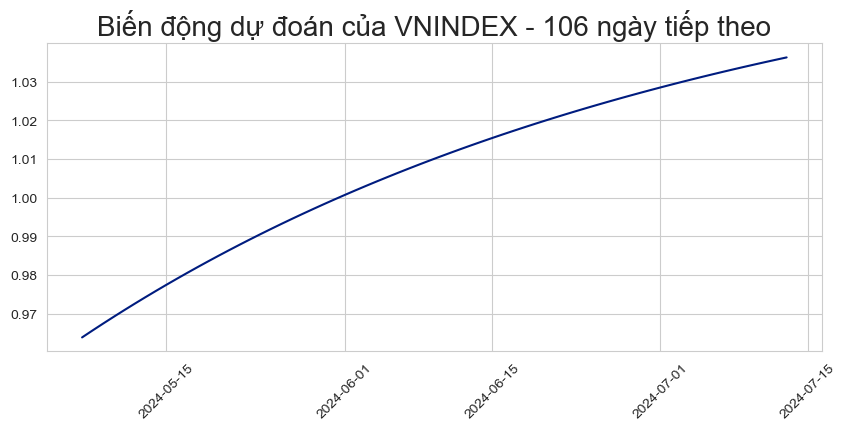

In [132]:
plt.figure(figsize=(10,4))
plt.plot(pred)
plt.xticks(rotation = 45)
plt.title(f'Biến động dự đoán của VNINDEX - {test_size} ngày tiếp theo', fontsize=20)
output_file_path = 'Garch_68.png'
plt.savefig(output_file_path, format='png', bbox_inches='tight')

# Show the plot (optional)
plt.show()
#plt.close()

Mô hình GARCH(1,1) dự đoán biến động tỷ suất sinh lời hằng ngày trong 106 ngày tới sẽ tăng từ mức độ biến động 0,97 lên tới hơn 1.03. Điều đó có nghĩa lợi nhuận giá hằng ngày trong tương lai sẽ tăng mạnh hơn dẫn đến việc có lời hơn hoặc giảm mạnh hơn dẫn đến việc rủi ro cao hơn

# Kết luận

Trong quá trình nghiên cứu và phân tích về tình hình của công ty VNDIRECT và sựtương quan của nó với thị trường chứng khoán nói chung, chúng ta đã đạt được một số nhận định quan trọng.

Trước hết, theo phương pháp FCFE, ta nhận thấy rằng giá cổ phiếu của VNDIRECT đang được giao dịch ở mức thấp hơn so với giá trị thực của công ty. Điều này cho thấy tiềm năng tăng trưởng của cổ phiếu này trong tương lai.

Không chỉ dừng lại ở phương pháp FCFE, các phương pháp định giá tương đối như chỉ số P/B cũng đã chỉ ra rằng VNDIRECT đang được định giá thấp hơn so với ngành và so với giá trị trung bình của chính nó trong 5 năm qua. Điều này là dấu hiệu tích cực về tiềm năng tăng giá của cổ phiếu VNDIRECT.

Mối tương quan chặt chẽ giữa giá cổ phiếu của VNDIRECT và chỉ số thị trường là điểm đáng chú ý đầu tiên. Điều này phản ánh sự ảnh hưởng của hoạt động kinh doanh của công ty đối với thị trường chứng khoán, với doanh thu chủ yếu từ hoạt động giao dịch của khách hàng. Khi thị trường sôi động, doanh thu tăng cao do khách hàng giao dịch nhiều hơn, trong khi khi thị trường suy thoái, doanh thu giảm do khách hàng giảm giao dịch.

Phân tích kỹ thuật cung cấp thông tin quan trọng về xu hướng giá của VNDIRECT. Tín hiệu bán được phát hiện khi đường giá cắt qua đường MA 20 ngày và MA 25 ngày từ trên xuống, cùng với đường MA 50 ngày. Điều này cho thấy khả năng giảm giá trong tương lai.

Cuối cùng, việc áp dụng phương pháp dự đoán chuỗi thời gian đã cung cấp thông tin quý giá về dự báo giá cổ phiếu và biến động giá của VNINDEX trong 106 ngày tiếp theo. Kết quả từ mô hình ARIMA cho thấy xu hướng giá của cổ phiếu có khả năng đi ngang trong thời gian tới. Ngoài ra, mô hình GARCH(1,1) dự báo biến động giá của VNINDEX sẽ tăng từ mức hiện tại 0.97 đến 1.03 trong 106 ngày tiếp theo.

Dựa trên tín hiệu giảm giá cổ phiếu VND từ xu hướng đường trung bình động – MA cùng kết quả xu hướng đi ngang của mô hình ARIMA và dự đoán tăng biến động theo mô hình GARCH(1,1) cho chỉ số VNINDEX, có thể ước lượng rằng giá cổ phiếu VND sẽ giảm trong xu hướng ngắn hạn, đi ngang với mức độ biến động tăng dần cho xu hướng dài hạn trong 106 ngày tiếp theo. Bởi vì giá cổ phiếu VND và chỉ số VNINDEX có mối tương quan chặt chẽ với nhau, nên chỉ số VNINDEX tăng thì giá đóng cửa của VND cũng có khả năng tăng.

Tóm lại, dựa trên những phân tích trên, có cơ sở để tin rằng VNDIRECT có tiềm năng tăng trưởng và đang được định giá thấp hơn so với giá trị thực của nó và so với ngành.

## END.

## BACK-UP CODE

## ****

import math
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from datetime import datetime 
import vnstock as vn

# List of stock codes
last_stock_list = ["VND", "VIX", "SHS", "TVS"]

#end = datetime.now()
end = datetime(2024, 1, 22)
start = datetime(end.year - 11, end.month, end.day)

start = start.strftime('%Y-%m-%d')
end = end.strftime('%Y-%m-%d')

# Determine the number of rows for the subplot
n = len(last_stock_list)
ncols = 2
nrows = math.ceil(n / ncols)

fig, axs = plt.subplots(nrows, ncols, figsize=(15, 5*nrows))

for i, stock_code in enumerate(last_stock_list):
    data = vn.stock_historical_data(stock_code, start, end, resolution='1D', type='stock').set_index("time")
    data = data.loc[~data.index.duplicated(keep='first')]  
    data = data.asfreq('D', method='ffill')
    data['Close_Log'] = np.log(data['close'])
    data['Close_Detrend'] = (data['close'] - data['close'].shift(30))
    data['Close_Detrend'] = data['Close_Detrend'].dropna()
    data['Close_Detrend_log'] = (data['Close_Log'] - data['Close_Log'].shift(30))
    

    Stock_data_arima = data['Close_Detrend_log'].dropna()
    test_size = 15
    train_data, test_data = Stock_data_arima[:-test_size], Stock_data_arima[-test_size:]

    model = auto_arima(train_data, start_p=0, start_q=0,
                          test='adf',       
                          max_p=3, max_q=3, 
                          m=1,              
                          d=None,           
                          seasonal=False,   
                          start_P=0, 
                          D=0, 
                          trace=True,
                          error_action='ignore',  
                          suppress_warnings=True, 
                          stepwise=False)

    prediction, confint = model.predict(n_periods= test_size, alpha=0.05, return_conf_int=True)
    cf= pd.DataFrame(confint)

    prediction_series = pd.Series(prediction,index=test_data.index)

    ax = axs[i//ncols, i%ncols]
    ax.plot(Stock_data_arima.last('6M'))
    ax.plot(prediction_series, color = 'orange')
    ax.fill_between(prediction_series.index, cf[0], cf[1], color='grey', alpha=.4)
    ax.set_title(stock_code, fontsize = 16)

plt.tight_layout()
#output_file_path = 'ARIMA_ALL_TEST.png'
#plt.savefig(output_file_path, format='png', bbox_inches='tight')
plt.show()
#plt.close()

from pmdarima import auto_arima
from datetime import datetime 
import vnstock as vn
import math
import matplotlib.pyplot as plt

# List of stock codes
last_stock_list = ["VND", "VIX", "SHS", "TVS"]

#end = datetime.now()
end = datetime(2024, 1, 22)
start = datetime(end.year - 11, end.month, end.day)

start = start.strftime('%Y-%m-%d')
end = end.strftime('%Y-%m-%d')
test_size = 15

fig, axs = plt.subplots(math.ceil(len(last_stock_list) / 2), 2, figsize=(15, 5 * math.ceil(len(last_stock_list) / 2)))

for i, stock_code in enumerate(last_stock_list):
    data = vn.stock_historical_data(stock_code, start, end, resolution='1D',
                                    type='stock').set_index("time")
    data = data.loc[~data.index.duplicated(keep='first')]  
    data = data.asfreq('D', method='ffill')
    data['Close_Log'] = np.log(data['close'])
    data['Close_Detrend'] = (data['close'] - data['close'].shift(30))
    data['Close_Detrend'] = data['Close_Detrend'].dropna()
    data['Close_Detrend_log'] = (data['Close_Log'] - data['Close_Log'].shift(30))


    Stock_data_arima = data['Close_Detrend_log'].dropna()
    train_data, test_data = Stock_data_arima[:-test_size], Stock_data_arima[-test_size:]

    model = auto_arima(Stock_data_arima, start_p=0, start_q=0,
                       test='adf',
                       max_p=3, max_q=3,
                       m=1,
                       d=None,
                       seasonal=False,
                       start_P=0,
                       D=0,
                       trace=True,
                       error_action='ignore',
                       suppress_warnings=True,
                       stepwise= False)

    forecast, confint = model.predict(n_periods=15, 
                                      alpha=0.05, 
                                      return_conf_int=True)

    cf = pd.DataFrame(confint, columns=['lower', 'upper'])
    next_15_days_index = pd.date_range(start=Stock_data_arima.index[-1] 
                                        + pd.DateOffset(1), 
                                        periods=15)
    prediction_series = pd.Series(forecast, index=next_15_days_index)

    ax = axs[i // 2, i % 2]
    ax.plot(Stock_data_arima[-60:], label='Original Series')
    ax.plot(prediction_series, label='Predicted Series', color = 'orange')
    ax.fill_between(prediction_series.index, 
                    cf['lower'], cf['upper'], 
                    color='grey', alpha=0.4, 
                    label='Confidence Interval')
    ax.legend(loc = 'upper left')
    ax.set_title(stock_code, fontsize = 16)

plt.tight_layout()
#output_file_path = 'ARIMA_ALL_FORC.png'
#plt.savefig(output_file_path, format='png', bbox_inches='tight')
plt.show()
#plt.close()

from pmdarima import auto_arima
from math import *
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime 
from dateutil.relativedelta import relativedelta
from arch import arch_model
import vnstock as vn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#end = datetime.now()
end = datetime(2024, 1, 22)
start = datetime(end.year - 11, end.month, end.day)

start = start.strftime('%Y-%m-%d')
end = end.strftime('%Y-%m-%d')

last_stock_list = ["VND", "VIX", "SHS", "TVS"]
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for i, stock_code in enumerate(last_stock_list):
    data = vn.stock_historical_data(stock_code, start, end, resolution='1D',
                                    type='stock').set_index("time")
    data = data.loc[~data.index.duplicated(keep='first')]  

    # Set the frequency to daily and forward fill missing values
    data = data.asfreq('D', method='ffill')
    data['Close_Log'] = np.log(data['close'])

    returns =  100* data.close.pct_change().dropna()

    rolling_predictions = []
    test_size = 365

    for j in range(test_size):
        train = returns[:-(test_size-j)]
        model = arch_model(train, p=1, q=1)
        model_fit = model.fit(disp='off')
        pred = model_fit.forecast(horizon=1)
        rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))
    
    rolling_predictions = pd.Series(rolling_predictions, 
                                    index=returns.index[-365:])
    ax = axs[i//2, i%2]
    true, = ax.plot(returns[-365:])
    preds, = ax.plot(rolling_predictions, color = 'orange')
    ax.set_title('Biến động dự đoán - Dự đoán trượt theo ngày ' + stock_code, fontsize=20)
    ax.legend(['Tỷ suất sinh lời hằng ngày thực tế', 'Biến động dự đoán'],
               loc = 'lower left', fontsize=12)

plt.tight_layout()
#output_file_path = 'GARCH_ALL_TEST.png'
#plt.savefig(output_file_path, format='png', bbox_inches='tight')
plt.show()
#plt.close()

from pmdarima import auto_arima
from math import *
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime, timedelta 
from dateutil.relativedelta import relativedelta
from arch import arch_model
import vnstock as vn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#end = datetime.now()
end = datetime(2024, 1, 22)
start = datetime(end.year - 11, end.month, end.day)

start = start.strftime('%Y-%m-%d')
end = end.strftime('%Y-%m-%d')

last_stock_list = ["VND", "VIX", "SHS", "TVS"]
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for i, stock_code in enumerate(last_stock_list):
    data = vn.stock_historical_data(stock_code, start, end, resolution='1D',
                                    type='stock').set_index("time")
    data = data.loc[~data.index.duplicated(keep='first')]  

    # Set the frequency to daily and forward fill missing values
    data = data.asfreq('D', method='ffill')
    data['Close_Log'] = np.log(data['close'])

    returns =  100* data.close.pct_change().dropna()

    model = arch_model(returns, p=1, q=1)
    model_fit = model.fit(disp='off')

    pred = model_fit.forecast(horizon=7)
    future_dates = [returns.index[-1] + timedelta(days=j) for j in range(1,8)]
    pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)

    ax = axs[i//2, i%2]
    ax.plot(pred)
    ax.set_title('Biến động dự đoán - 15 ngày tiếp theo của ' + stock_code, fontsize=20)
    ax.set_xticks(pred.index)
    ax.set_xticklabels([date.strftime('%Y-%m-%d') for date in pred.index], rotation=45)

plt.tight_layout()
#output_file_path = 'GARCH_ALL_FORC.png'
#plt.savefig(output_file_path, format='png', bbox_inches='tight')
plt.show()
#plt.close()
